In [147]:
ls

2021-Long-term-Outlook-data-file-updated-Aug-11.xlsx
AESO_analysis.ipynb
AESO_data.ipynb
EvGenFor.csv
Gen Table.csv
Gen_Table.csv
Gen_Table.xls
Untitled.ipynb
columnDataSource.html


In [148]:
pwd

'/Users/mathew/Desktop/Summer_Research_2022/jupyter_notebook'

# AESO Data Forecast Analysis
## Import Libraries

In [149]:
# Render our plots inline
%matplotlib inline

# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [150]:
# Creates variable with cwd
path = os.getcwd()

print(path)

/Users/mathew/Desktop/Summer_Research_2022/jupyter_notebook


# Historical Hourly Generation Data

## Objective of Section:

1. Open AESO historical hourly data.
2. Clean data.
3. Create hourly average capacity factors for renewable, *Wind and Solar*.
4. Combine hourly average capacity factors for renewables into a single dataframe.

**Open Raw Data Files**

Original 'Gen Table.csv' file was opened in excel where titles were split across the first two rows of each column.
Titles were combined and excess title row eliminated in excel before exporting as 'Gen_Table.csv' and opening
in the cell below.

In [151]:
# 'Gen Table.csv', historical hourly data

# Read and generate DataFrame from file
gen_hist = pd.read_csv(path + '/Gen_Table.csv')

# Find properties
print(type(gen_hist))

display(gen_hist)

<class 'pandas.core.frame.DataFrame'>


/var/folders/lv/_brj3nmd2rb3b5n0hfm2l8fc0000gn/T/ipykernel_91332/4043333214.py:4: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,43,44,52,53,54,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  gen_hist = pd.read_csv(path + '/Gen_Table.csv')


,Date - MST,Coal Capacity,Coal Available,Coal Utilized,Coal Avg. Availability Factor,Coal Avg. Availability Utilization,Coal Avg. Capacity Factor,Cogeneration Capacity,Cogeneration Available,Cogeneration Utilized,...,Storage Utilized,Storage Avg. Availability Factor,Storage Avg. Availability Utilization,Storage Avg. Capacity Factor,Wind Capacity,Wind Available,Wind Utilized,Wind Avg. Availability Factor,Wind Avg. Availability Utilization,Wind Avg. Capacity Factor
0,1/1/2015 12:00:00 AM,"6,271","5,609","5,021",89.44%,89.50%,80.10%,"4,533","2,761","1,192",...,NaN,NaN,NaN,NaN,"1,434",132,863,9.21%,653.80%,60.20%
1,1/1/2015 1:00:00 AM,"6,271","5,487","4,879",87.50%,88.90%,77.80%,"4,533","2,769","1,215",...,NaN,NaN,NaN,NaN,"1,434",132,926,9.21%,701.70%,64.60%
2,1/1/2015 2:00:00 AM,"6,271","5,826","4,689",92.90%,80.50%,74.80%,"4,533","2,775","1,067",...,NaN,NaN,NaN,NaN,"1,434",132,824,9.21%,624.00%,57.40%
3,1/1/2015 3:00:00 AM,"6,271","5,826","4,554",92.90%,78.20%,72.60%,"4,533","2,775","1,050",...,NaN,NaN,NaN,NaN,"1,434",132,765,9.21%,579.50%,53.30%
4,1/1/2015 4:00:00 AM,"6,271","5,586","4,465",89.08%,79.90%,71.20%,"4,533","2,782","1,052",...,NaN,NaN,NaN,NaN,"1,434",132,824,9.21%,624.30%,57.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62780,2/28/2022 8:00:00 PM,"1,266","1,266","1,265",100.00%,99.90%,99.90%,"5,247","3,529","1,969",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",597,90.74%,29.00%,26.30%
62781,2/28/2022 9:00:00 PM,"1,266","1,266","1,264",100.00%,99.90%,99.90%,"5,247","3,537","1,958",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",470,90.74%,22.80%,20.70%
62782,2/28/2022 10:00:00 PM,"1,266","1,266","1,265",100.00%,99.90%,99.90%,"5,247","3,533","1,958",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",310,90.74%,15.10%,13.70%
62783,2/28/2022 11:00:00 PM,"1,266","1,266","1,264",100.00%,99.80%,99.80%,"5,247","3,522","1,918",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",112,90.74%,5.50%,5.00%


In [152]:
gen_hist.describe()

,Dual Fuel Capacity,Dual Fuel Available,Dual Fuel Utilized,Hydro Capacity,Hydro Available,Hydro Utilized,Other Capacity,Other Available,Other Utilized,Simple Cycle Utilized,Solar Capacity,Solar Available,Solar Utilized,Storage Capacity,Storage Available,Storage Utilized
count,34969.000000,34969.000000,34969.000000,62785.0,62785.000000,62785.000000,62785.000000,62785.000000,62785.000000,62785.000000,37129.000000,37129.000000,37129.000000,11642.000000,11642.000000,11642.000000
mean,473.444050,450.279791,174.092396,894.0,705.116079,211.319025,385.597547,145.595190,69.104229,226.499403,124.682809,95.157586,17.568666,35.031781,30.662773,0.060986
std,350.011902,346.770913,166.775877,0.0,87.097257,98.287391,5.311723,23.922422,15.310327,182.698975,177.501474,118.079420,47.688897,11.100583,12.845938,0.713288
min,155.000000,0.000000,0.000000,894.0,255.000000,41.000000,367.000000,18.000000,13.000000,0.000000,15.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,155.000000,155.000000,56.000000,894.0,659.000000,140.000000,381.000000,133.000000,60.000000,44.000000,15.000000,15.000000,0.000000,30.000000,23.000000,0.000000
50%,155.000000,155.000000,123.000000,894.0,716.000000,191.000000,384.000000,152.000000,71.000000,215.000000,15.000000,15.000000,0.000000,30.000000,30.000000,0.000000
75%,930.000000,930.000000,241.000000,894.0,761.000000,259.000000,392.000000,162.000000,79.000000,356.000000,240.000000,127.000000,8.000000,50.000000,46.000000,0.000000
max,940.000000,940.000000,940.000000,894.0,865.000000,696.000000,395.000000,201.000000,132.000000,884.000000,777.000000,351.000000,311.000000,50.000000,50.000000,25.000000


In [153]:
gen_hist.columns

Index(['Date - MST', 'Coal Capacity', 'Coal Available', 'Coal Utilized',
       'Coal Avg. Availability Factor', 'Coal Avg. Availability Utilization',
       'Coal Avg. Capacity Factor', 'Cogeneration Capacity',
       'Cogeneration Available', 'Cogeneration Utilized',
       'Cogeneration Avg. Availability Factor',
       'Cogeneration Avg. Availability Utilization',
       'Cogeneration Avg. Capacity Factor', 'Combined Cycle Capacity',
       'Combined Cycle Available', 'Combined Cycle Utilized',
       'Combined Cycle Avg. Availability Factor',
       'Combined Cycle Avg. Availability Utilization',
       'Combined Cycle Avg. Capacity Factor', 'Dual Fuel Capacity',
       'Dual Fuel Available', 'Dual Fuel Utilized',
       'Dual Fuel Avg. Availability Factor',
       'Dual Fuel Avg. Availability Utilization',
       'Dual Fuel Avg. Capacity Factor', 'Gas Fired Steam Capacity',
       'Gas Fired Steam Available', 'Gas Fired Steam Utilized',
       'Gas Fired Steam Avg. Availability F

In [154]:
gen_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62785 entries, 0 to 62784
Data columns (total 67 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date - MST                                     62785 non-null  object 
 1   Coal Capacity                                  62785 non-null  object 
 2   Coal Available                                 62785 non-null  object 
 3   Coal Utilized                                  62785 non-null  object 
 4   Coal Avg. Availability Factor                  62785 non-null  object 
 5   Coal Avg. Availability Utilization             62785 non-null  object 
 6   Coal Avg. Capacity Factor                      62785 non-null  object 
 7   Cogeneration Capacity                          62785 non-null  object 
 8   Cogeneration Available                         62785 non-null  object 
 9   Cogeneration Utilized                          627

In [155]:

gen_hist.fillna(value=0, axis=1, inplace=True)
# gen_hist.replace(np.nan,0)
# g.shape
display(gen_hist)

,Date - MST,Coal Capacity,Coal Available,Coal Utilized,Coal Avg. Availability Factor,Coal Avg. Availability Utilization,Coal Avg. Capacity Factor,Cogeneration Capacity,Cogeneration Available,Cogeneration Utilized,...,Storage Utilized,Storage Avg. Availability Factor,Storage Avg. Availability Utilization,Storage Avg. Capacity Factor,Wind Capacity,Wind Available,Wind Utilized,Wind Avg. Availability Factor,Wind Avg. Availability Utilization,Wind Avg. Capacity Factor
0,1/1/2015 12:00:00 AM,"6,271","5,609","5,021",89.44%,89.50%,80.10%,"4,533","2,761","1,192",...,0,0,0,0,"1,434",132,863,9.21%,653.80%,60.20%
1,1/1/2015 1:00:00 AM,"6,271","5,487","4,879",87.50%,88.90%,77.80%,"4,533","2,769","1,215",...,0,0,0,0,"1,434",132,926,9.21%,701.70%,64.60%
2,1/1/2015 2:00:00 AM,"6,271","5,826","4,689",92.90%,80.50%,74.80%,"4,533","2,775","1,067",...,0,0,0,0,"1,434",132,824,9.21%,624.00%,57.40%
3,1/1/2015 3:00:00 AM,"6,271","5,826","4,554",92.90%,78.20%,72.60%,"4,533","2,775","1,050",...,0,0,0,0,"1,434",132,765,9.21%,579.50%,53.30%
4,1/1/2015 4:00:00 AM,"6,271","5,586","4,465",89.08%,79.90%,71.20%,"4,533","2,782","1,052",...,0,0,0,0,"1,434",132,824,9.21%,624.30%,57.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62780,2/28/2022 8:00:00 PM,"1,266","1,266","1,265",100.00%,99.90%,99.90%,"5,247","3,529","1,969",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",597,90.74%,29.00%,26.30%
62781,2/28/2022 9:00:00 PM,"1,266","1,266","1,264",100.00%,99.90%,99.90%,"5,247","3,537","1,958",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",470,90.74%,22.80%,20.70%
62782,2/28/2022 10:00:00 PM,"1,266","1,266","1,265",100.00%,99.90%,99.90%,"5,247","3,533","1,958",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",310,90.74%,15.10%,13.70%
62783,2/28/2022 11:00:00 PM,"1,266","1,266","1,264",100.00%,99.80%,99.80%,"5,247","3,522","1,918",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",112,90.74%,5.50%,5.00%


In [156]:
gen_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62785 entries, 0 to 62784
Data columns (total 67 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Date - MST                                     62785 non-null  object
 1   Coal Capacity                                  62785 non-null  object
 2   Coal Available                                 62785 non-null  object
 3   Coal Utilized                                  62785 non-null  object
 4   Coal Avg. Availability Factor                  62785 non-null  object
 5   Coal Avg. Availability Utilization             62785 non-null  object
 6   Coal Avg. Capacity Factor                      62785 non-null  object
 7   Cogeneration Capacity                          62785 non-null  object
 8   Cogeneration Available                         62785 non-null  object
 9   Cogeneration Utilized                          62785 non-null

In [157]:
# Check column type.
print(gen_hist['Date - MST'].dtypes)


object


In [158]:
# Convert series 's' to DataFrame
s = pd.to_datetime(gen_hist['Date - MST']) 
s = s.to_frame(name='Date')

print(s)

                     Date
0     2015-01-01 00:00:00
1     2015-01-01 01:00:00
2     2015-01-01 02:00:00
3     2015-01-01 03:00:00
4     2015-01-01 04:00:00
...                   ...
62780 2022-02-28 20:00:00
62781 2022-02-28 21:00:00
62782 2022-02-28 22:00:00
62783 2022-02-28 23:00:00
62784 2022-03-01 00:00:00

[62785 rows x 1 columns]


In [159]:
# Create separate columns for date specifics.
s['year'] = s['Date'].dt.year
s['month'] = s['Date'].dt.month
s['day'] = s['Date'].dt.day
s['hour'] = s['Date'].dt.hour

# Convert 'hour' column to 'HourEnding' column
# to match LTO sheet headings.
s['HourEnding'] = s['hour'] + 1
del s['hour']

print(s)

                     Date  year  month  day  HourEnding
0     2015-01-01 00:00:00  2015      1    1           1
1     2015-01-01 01:00:00  2015      1    1           2
2     2015-01-01 02:00:00  2015      1    1           3
3     2015-01-01 03:00:00  2015      1    1           4
4     2015-01-01 04:00:00  2015      1    1           5
...                   ...   ...    ...  ...         ...
62780 2022-02-28 20:00:00  2022      2   28          21
62781 2022-02-28 21:00:00  2022      2   28          22
62782 2022-02-28 22:00:00  2022      2   28          23
62783 2022-02-28 23:00:00  2022      2   28          24
62784 2022-03-01 00:00:00  2022      3    1           1

[62785 rows x 5 columns]


In [160]:
# Joins columns of the two dataframes into one
s = s.join(gen_hist)

# Comment-in below code to test above operation.

# print(s)

In [161]:
# df.drop("column_name", axis=1, inplace=True)
# drop the original 'Date - Time' column
# axis=1 indicates column drop
# inplace=True indicates not to make a new dataframe after the drop

s.drop("Date - MST", axis=1, inplace=True)

# Comment-in below code to test above operations
# print(s)

In [162]:
# Update original 'gen_hist' variable and delete s.
gen_hist = s

del s

# Comment-in code below to test above operations
# print(gen_hist)

In [163]:
# Convert the necessary object columns to floats, stipping off the %.
gen_hist['Wind Avg. Capacity Factor'] = gen_hist['Wind Avg. Capacity Factor'].str.rstrip('%').astype('float') / 100.0
gen_hist['Solar Avg. Capacity Factor'] = gen_hist['Solar Avg. Capacity Factor'].str.rstrip('%').astype('float') / 100.0
gen_hist['Storage Avg. Capacity Factor'] = gen_hist['Storage Avg. Capacity Factor'].str.rstrip('%').astype('float') / 100.0

# View the above code's results.
# Comment-in below code to test above operations

# gen_hist.info()
# print(gen_hist)

In [164]:
# Use .groupby to find "Wind Avg. Capacity Factor" for each hour in the year using
# historical hourly Capacity Factor data in gen_hist from across several years.
temp1 = gen_hist.groupby(["month", "day", "HourEnding"]).mean()["Wind Avg. Capacity Factor"].copy()

# Converts series to dataframe.
temp1 = temp1.to_frame()

# Create a capacity factor Standard Deviation column in temp1. 
temp1["Wind Avg. Capacity Factor std"]\
        = gen_hist.groupby(["month", "day", "HourEnding"]).std()["Wind Avg. Capacity Factor"]

# Coverts indices into dataframe columns.
temp1.reset_index(inplace=True)

# Use the code below to test/check results of above operations.

# print(temp1)
# display(temp1)
# temp1.shape


In [165]:
# Create variable out of dataframe to manipulate
s = gen_hist.copy()

# EXAMPLE CODE: df.drop(df.index[df['Col1'] == 0], inplace=True)
# Remove all rows where 'Solar Capacity' was zero to give an
# accurate mean of the Solar Capacity Factor
s.drop(s.index[s['Solar Capacity'] == 0], inplace=True)

# Comment-in below code to test above operations
# s.info()
# s.shape
# display(s[{'Date', "Solar Capacity"}])

# Use .groupby to find "Solar Avg. Capacity Factor" for each hour in the year using
# historical hourly Capacity Factor data in gen_hist from across several years.
temp2 = gen_hist.groupby(["month", "day", "HourEnding"]).mean()["Solar Avg. Capacity Factor"]

# Converts series to dataframe.
temp2 = temp2.to_frame()

# Create a capacity factor Standard Deviation column in temp2.
temp2["Solar Avg. Capacity Factor std"]\
        = gen_hist.groupby(["month", "day", "HourEnding"]).std()["Solar Avg. Capacity Factor"]

# Coverts indices into dataframe columns.
temp2.reset_index(inplace=True)

# Comment-in below code to test/check results of above operations.

# print(temp2)
display(temp2)
# temp2.shape

# print(temp2.iloc[13])

,month,day,HourEnding,Solar Avg. Capacity Factor,Solar Avg. Capacity Factor std
0,1,1,1,0.0,0.0
1,1,1,2,0.0,0.0
2,1,1,3,0.0,0.0
3,1,1,4,0.0,0.0
4,1,1,5,0.0,0.0
...,...,...,...,...,...
8779,12,31,20,0.0,0.0
8780,12,31,21,0.0,0.0
8781,12,31,22,0.0,0.0
8782,12,31,23,0.0,0.0


In [166]:
temp2['Wind Avg. Capacity Factor'] = temp1['Wind Avg. Capacity Factor']
temp2["Wind Avg. Capacity Factor std"] = temp1["Wind Avg. Capacity Factor std"]
display(temp2)

# Create the Renewable Capacity Factor dataframe
cf = temp2.copy()

# print(cf)
display(cf)

,month,day,HourEnding,Solar Avg. Capacity Factor,Solar Avg. Capacity Factor std,Wind Avg. Capacity Factor,Wind Avg. Capacity Factor std
0,1,1,1,0.0,0.0,0.539125,0.227798
1,1,1,2,0.0,0.0,0.560375,0.228928
2,1,1,3,0.0,0.0,0.544500,0.224885
3,1,1,4,0.0,0.0,0.546125,0.220870
4,1,1,5,0.0,0.0,0.546875,0.225787
...,...,...,...,...,...,...,...
8779,12,31,20,0.0,0.0,0.428857,0.307075
8780,12,31,21,0.0,0.0,0.450429,0.298409
8781,12,31,22,0.0,0.0,0.483000,0.290872
8782,12,31,23,0.0,0.0,0.520286,0.283724


,month,day,HourEnding,Solar Avg. Capacity Factor,Solar Avg. Capacity Factor std,Wind Avg. Capacity Factor,Wind Avg. Capacity Factor std
0,1,1,1,0.0,0.0,0.539125,0.227798
1,1,1,2,0.0,0.0,0.560375,0.228928
2,1,1,3,0.0,0.0,0.544500,0.224885
3,1,1,4,0.0,0.0,0.546125,0.220870
4,1,1,5,0.0,0.0,0.546875,0.225787
...,...,...,...,...,...,...,...
8779,12,31,20,0.0,0.0,0.428857,0.307075
8780,12,31,21,0.0,0.0,0.450429,0.298409
8781,12,31,22,0.0,0.0,0.483000,0.290872
8782,12,31,23,0.0,0.0,0.520286,0.283724


In [167]:
cf.rename(columns = {"HourEnding":"Hour Ending"}, inplace=True)

In [168]:
del temp1
del temp2

# Forecasted Hourly Loading

## Objectives of Section:

1. Open applicable excel sheets from AESO website,
2. Create forecasted hourly EV loading for *Clean-Tech* scenario.
3. Create forecasted hourly expected renewable generation capacity.
4. Use hourly capacity factor obtained in the previous section to generate expected hourly renewable generation.

Excel File from AESO: [2021 Long Term Outlook](https://www.aeso.ca/assets/2021-Long-term-Outlook-data-file-updated-Aug-11.xlsx)

<mark>ref and ct will be used in column headings to indicate Reference Case and Clean-Tech Case respectively<mark>

### Open all excel file sheets to be used.

Create dataframes out of each excel sheet to be used for this section.

**Electric Vehicle Forecast Data**

In [169]:
# EXAMPLE CODE: df_sheet_index = pd.read_excel('sample.xlsx', sheet_name=1)

# Location of AESO file at the time of writing this code.
url = "https://www.aeso.ca/assets/2021-Long-term-Outlook-data-file-updated-Aug-11.xlsx"

evfor = pd.read_excel(url, sheet_name="Electric Vehicle Forecast")

In [170]:
# print(evfor)
evfor.shape

(42, 3)

In [171]:
display(evfor)

,Calendar Year,Scenario,Number of Electric Vehicles
0,2021,1 Reference Case/Robust/Stagnant,1.513070e+04
1,2022,1 Reference Case/Robust/Stagnant,1.625634e+04
2,2023,1 Reference Case/Robust/Stagnant,1.746573e+04
3,2024,1 Reference Case/Robust/Stagnant,1.876508e+04
4,2025,1 Reference Case/Robust/Stagnant,2.016110e+04
5,2026,1 Reference Case/Robust/Stagnant,2.166098e+04
6,2027,1 Reference Case/Robust/Stagnant,2.327244e+04
7,2028,1 Reference Case/Robust/Stagnant,2.500379e+04
8,2029,1 Reference Case/Robust/Stagnant,2.686393e+04
9,2030,1 Reference Case/Robust/Stagnant,3.169944e+04


In [172]:
evfor.describe()

,Calendar Year,Number of Electric Vehicles
count,42.000000,4.200000e+01
mean,2031.000000,3.098425e+05
std,6.128701,4.786773e+05
min,2021.000000,1.513070e+04
25%,2026.000000,2.807281e+04
50%,2031.000000,1.008916e+05
75%,2036.000000,2.878309e+05
max,2041.000000,1.957734e+06


In [173]:
evfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Calendar Year                42 non-null     int64  
 1   Scenario                     42 non-null     object 
 2   Number of Electric Vehicles  42 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [174]:
evfor.columns

Index(['Calendar Year', 'Scenario', 'Number of Electric Vehicles'], dtype='object')

**Forecasted Generation Data by Fuel Type**

In [175]:
# Forecasted Generation Data by Fuel Type.
genfor = pd.read_excel(url, sheet_name="Generation data by fuel type")

In [176]:
genfor.shape

(5040, 5)

In [177]:
display(genfor)

,Calendar Year,Scenario,Fuel Type,Category,Value
0,2021,1 Reference Case,Combined Cycle,Output (GWh),1.062828e+04
1,2021,1 Reference Case,Coal,Output (GWh),9.545706e+03
2,2021,1 Reference Case,Cogeneration,Output (GWh),3.295556e+04
3,2021,1 Reference Case,Coal to Gas - Steam Boiler,Output (GWh),1.127525e+04
4,2021,1 Reference Case,Solar/Storage,Output (GWh),7.340163e+00
...,...,...,...,...,...
5035,2041,4 Stagnant Scenario,Other,Carbon Emissions (Tonnes),NaN
5036,2041,4 Stagnant Scenario,Simple Cycle,Carbon Emissions (Tonnes),1.853832e+06
5037,2041,4 Stagnant Scenario,Solar,Carbon Emissions (Tonnes),NaN
5038,2041,4 Stagnant Scenario,Storage,Carbon Emissions (Tonnes),NaN


In [178]:
genfor.describe()

,Calendar Year,Value
count,5040.000000,4.126000e+03
mean,2031.000000,3.839258e+05
std,6.055902,1.517402e+06
min,2021.000000,-2.548058e+03
25%,2026.000000,4.534435e-01
50%,2031.000000,8.940000e+02
75%,2036.000000,3.976300e+03
max,2041.000000,1.240434e+07


In [179]:
genfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Calendar Year  5040 non-null   int64  
 1   Scenario       5040 non-null   object 
 2   Fuel Type      5040 non-null   object 
 3   Category       5040 non-null   object 
 4   Value          4126 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 197.0+ KB


In [180]:
genfor.columns

Index(['Calendar Year', 'Scenario', 'Fuel Type', 'Category', 'Value'], dtype='object')

**Hourly EV Loading (MWH), Reference Case**

In [181]:
# EV hourly data forecast for Reference Scenario.
# Includes other data which has to be wrangled.

evhr = pd.read_excel(url, sheet_name="Reference Case Hourly AIL")


In [182]:
evhr.shape

(186960, 8)

In [183]:
display(evhr)

,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load (MWh)*
0,2021-01-01,1,9325.605426,9370.068492,-24.159188,0.000000,-32.396111,12.092234
1,2021-01-01,2,9203.185949,9253.657741,-24.694282,0.000000,-33.920634,8.143125
2,2021-01-01,3,9130.521087,9185.157278,-25.138566,0.000000,-34.120225,4.622601
3,2021-01-01,4,9103.123785,9160.286283,-25.062748,0.000000,-34.120225,2.020475
4,2021-01-01,5,9112.99721,9164.864530,-24.390170,0.000000,-34.120225,6.643075
...,...,...,...,...,...,...,...,...
186955,2042-04-30,21,10885.88029,10439.690840,-54.120304,-29.804697,-18.927394,549.041961
186956,2042-04-30,22,10902.85033,10456.512060,-52.662007,-9.934899,-11.897219,520.832384
186957,2042-04-30,23,10772.02877,10356.078100,-52.045862,0.000000,-2.163131,470.159624
186958,2042-04-30,24,10367.9366,10036.250140,-49.728147,0.000000,-13.519567,394.934084


In [184]:
evhr.drop(evhr.tail(1).index, axis=0, inplace=True)

In [185]:
display(evhr)

,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load (MWh)*
0,2021-01-01,1,9325.605426,9370.068492,-24.159188,0.000000,-32.396111,12.092234
1,2021-01-01,2,9203.185949,9253.657741,-24.694282,0.000000,-33.920634,8.143125
2,2021-01-01,3,9130.521087,9185.157278,-25.138566,0.000000,-34.120225,4.622601
3,2021-01-01,4,9103.123785,9160.286283,-25.062748,0.000000,-34.120225,2.020475
4,2021-01-01,5,9112.99721,9164.864530,-24.390170,0.000000,-34.120225,6.643075
...,...,...,...,...,...,...,...,...
186954,2042-04-30,20,10754.29144,10464.827380,-55.059350,-129.153687,-19.468176,493.145206
186955,2042-04-30,21,10885.88029,10439.690840,-54.120304,-29.804697,-18.927394,549.041961
186956,2042-04-30,22,10902.85033,10456.512060,-52.662007,-9.934899,-11.897219,520.832384
186957,2042-04-30,23,10772.02877,10356.078100,-52.045862,0.000000,-2.163131,470.159624


In [186]:
evhr.describe()

,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load (MWh)*
count,186959.000000,186959.000000,186959.000000,186959.000000,186959.000000
mean,10444.091092,-37.019329,-87.405931,-16.587042,45.693675
std,813.350279,9.496950,164.648553,15.828546,66.663378
min,8083.758933,-78.399841,-746.371902,-48.412856,0.902940
25%,9850.903588,-43.522958,-97.744769,-32.120508,9.462920
50%,10450.431260,-36.141007,0.000000,-11.196784,21.898472
75%,11022.851730,-29.779493,0.000000,-1.485503,50.505934
max,12665.231330,-14.353983,0.000000,0.000000,549.041961


In [187]:
evhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186959 entries, 0 to 186958
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Calendar Date                   186959 non-null  datetime64[ns]
 1   Hour Ending                     186959 non-null  object        
 2   AIL (MWh)*                      186959 non-null  object        
 3   AIL_Raw (MWh)*                  186959 non-null  float64       
 4    Less than 5 MW DER_gas (MWh)*  186959 non-null  float64       
 5   Less than 5 MW DER_PV (MWh)*    186959 non-null  float64       
 6   Less than 5 MW DER_Wind (MWh)*  186959 non-null  float64       
 7   EV Load (MWh)*                  186959 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 11.4+ MB


In [188]:
evhr.columns

Index(['Calendar Date', 'Hour Ending', 'AIL (MWh)*', 'AIL_Raw (MWh)*',
       ' Less than 5 MW DER_gas (MWh)*', 'Less than 5 MW DER_PV (MWh)*',
       'Less than 5 MW DER_Wind (MWh)*', 'EV Load (MWh)*'],
      dtype='object')

**Create forecasted hourly EV loading for *Clean-Tech* scenario.**

In [189]:
# Create copy dataframes to manipulate

# Create a dataframe containing the reference case EV numbers.
a  = evfor[evfor["Scenario"] == "1 Reference Case/Robust/Stagnant"].copy()
a.rename(columns = {"Number of Electric Vehicles":"Number of Electric Vehicles ref"}, inplace = True)

# Create a dataframe containing the Clean-Tech case EV numbers
b = evfor[evfor["Scenario"] == "2 Clean-Tech Scenario"].copy()
b.rename(columns = {"Number of Electric Vehicles":"Number of Electric Vehicles ct"}, inplace = True)

# Comment-in below code to display above results for a check.
# display(a)
# display(b)

# Add Clean-Tech EV numbers in column beside Reference EV numbers
# Drop the scenario column
a["Number of Electric Vehicles ct"] = b["Number of Electric Vehicles ct"].to_numpy()
a.drop(columns="Scenario", inplace=True)

# Create a ratio column of Clean-Tech EV to Reference EV numbers
a["EV ratio multiplier"] = a["Number of Electric Vehicles ct"] / a["Number of Electric Vehicles ref"]

# Create a final dataframe to use for EV ratio multiplication
# and delete the variable objects.
ev_mult = a.copy()
del a
del b

# Comment-in below code to display above result for a check.
display(ev_mult)

,Calendar Year,Number of Electric Vehicles ref,Number of Electric Vehicles ct,EV ratio multiplier
0,2021,15130.699460,1.513070e+04,1.0
1,2022,16256.342125,2.438451e+04,1.5
2,2023,17465.726551,3.493145e+04,2.0
3,2024,18765.082673,7.506033e+04,4.0
4,2025,20161.103903,1.008055e+05,5.0
5,2026,21660.981605,1.299659e+05,6.0
6,2027,23272.442141,1.396347e+05,6.0
7,2028,25003.786674,1.750265e+05,7.0
8,2029,26863.933930,1.880475e+05,7.0
9,2030,31699.442037,2.535955e+05,8.0


In [190]:
# Check column type.
print(evhr['Calendar Date'].dtypes)

datetime64[ns]


In [191]:
# Convert series 's' to DataFrame
s = evhr["Calendar Date"].copy()
s = s.to_frame(name="Date")

# print(s)

# Create separate columns for date specifics.
s['year'] = s['Date'].dt.year
s['month'] = s['Date'].dt.month
s['day'] = s['Date'].dt.day

# print(s)
# display(s)

# Joins columns of the two dataframes into one
s = s.join(evhr)

# print(s)
# display(s)

# Remove the rows for year 2042 since we don't have EV Load ratio multiplier
# data for this year.
s = s.loc[s["year"] != 2042].copy()

# display(s)

In [192]:
# Update original 'evhr' variable.
evhr = s.copy()

# Rename column
evhr.rename(columns = {"EV Load (MWh)*":"EV Load ref (MWh)"}, inplace = True)

# print(evhr)
display(evhr)

,Date,year,month,day,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load ref (MWh)
0,2021-01-01,2021,1,1,2021-01-01,1,9325.605426,9370.068492,-24.159188,0.0,-32.396111,12.092234
1,2021-01-01,2021,1,1,2021-01-01,2,9203.185949,9253.657741,-24.694282,0.0,-33.920634,8.143125
2,2021-01-01,2021,1,1,2021-01-01,3,9130.521087,9185.157278,-25.138566,0.0,-34.120225,4.622601
3,2021-01-01,2021,1,1,2021-01-01,4,9103.123785,9160.286283,-25.062748,0.0,-34.120225,2.020475
4,2021-01-01,2021,1,1,2021-01-01,5,9112.99721,9164.864530,-24.390170,0.0,-34.120225,6.643075
...,...,...,...,...,...,...,...,...,...,...,...,...
184075,2041-12-31,2041,12,31,2041-12-31,20,11822.672524,11459.416610,-57.046646,0.0,-42.654416,462.956971
184076,2041-12-31,2041,12,31,2041-12-31,21,11671.613022,11325.158040,-51.127376,0.0,-41.588056,439.170409
184077,2041-12-31,2041,12,31,2041-12-31,22,11406.87381,11091.460570,-49.571826,0.0,-31.457632,396.442696
184078,2041-12-31,2041,12,31,2041-12-31,23,11039.572336,10771.965210,-49.409333,0.0,-15.995406,333.011865


In [193]:
# Delete DataFrame variable from above.
del s

In [194]:
# Find Clean-Tech EV loading.

# Dataframes required:  evhr, ev_mult

# Rename year column to match colum in evhr
ev_mult.rename(columns = {"Calendar Year":"year"}, inplace=True)

# display(ev_mult)
# display(evhr)

# Join ev_mult with evhr on year column.
# Note:  This cell cannot be re-ran without resetting evhr variable
# due to the change below.
evhr = evhr.join(ev_mult.set_index("year"), on="year")

# display(evhr)

In [195]:
# This code is just here to test the results from the above 
# manipulations.  A test across a few cells shows agreement with
# the applicable "EV ratio multiplier" on several years.
# This code is NOT required to run the program.

# display(evhr)
# display(evhr.loc[76428])

### Extrapolate Clean-Tech Scenario Hourly EV Load Data

**EV Clean-Tech Hourly Load Assumptions**

EV Clean-Tech Loading projection has been extrapolated by assuming that the increased hourly loading
would be directly proportional to increase in the number of EVs in the market, compared against the Reference 
scenario.  It is further assumed that the daily loading pattern does not change under this overall EV
increase, following the identical hourly loading pattern of the Reference case multiplied by the magnitude increase
EVs.

In [196]:
# Extrapolate hourly Clean-Tech EV loading, assuming a direct proportional relationship to number of EVs.
evhr["EV Load ct (MWh)"] = evhr["EV Load ref (MWh)"] * evhr["EV ratio multiplier"]

# display(evhr)

### Forecast Renewable Generation Capacity and Hourly Generation Output

**Assumptions and methods used for this section**

We will use "Capacity Begin Year (MW)" data (from DataFrame genfor) for each year and assume that this generation is constant throughout the entire year in question.  New generation data will be assumed to come online Jan 1 of each year, inline with the "Capacity Begine Year (MW)".  Although this does not account for generation capacity that comes online throughout the year, we consider this to be a good approximation for this analysis.

Historical capacity factor average (DataFrame cf) will be used to provide hourly generation ouput for renewables.  Although this does not account for outliers (ie. days the wind simply does not blow or wind capacity hit 95%), this will be considered a good approximation to project hourly renewable generation output against capacity.  This assumption can be achieved since renewables are generally dispatched to the grid, through the power pool, at $0.  This dispatching practice indicates that generation of renewables (Wind and Solar) will be unaffected by rising Carbon Taxes.  This is the same reason why historical thermal generation average capacity factors cannot be used to describe future thermal generation.

Finally, AESO describes a generation "Fuel Type" of "Solar/Storage" (DataFrame genfor) whose contributions to the grid are minimal and will be ignored.  "Fuel Type" under consideration for renewables will be "Wind" and "Solar".

In [197]:
# This entire cell is to provide the programmer information to code the next cell.  Not required to run the program.
display(genfor)

list1 = pd.unique(genfor["Scenario"])
list2 = pd.unique(genfor["Category"])
list3 = pd.unique(genfor["Fuel Type"])

print(list1)
print(list2)
print(list3)

del list1
del list2
del list3

,Calendar Year,Scenario,Fuel Type,Category,Value
0,2021,1 Reference Case,Combined Cycle,Output (GWh),1.062828e+04
1,2021,1 Reference Case,Coal,Output (GWh),9.545706e+03
2,2021,1 Reference Case,Cogeneration,Output (GWh),3.295556e+04
3,2021,1 Reference Case,Coal to Gas - Steam Boiler,Output (GWh),1.127525e+04
4,2021,1 Reference Case,Solar/Storage,Output (GWh),7.340163e+00
...,...,...,...,...,...
5035,2041,4 Stagnant Scenario,Other,Carbon Emissions (Tonnes),NaN
5036,2041,4 Stagnant Scenario,Simple Cycle,Carbon Emissions (Tonnes),1.853832e+06
5037,2041,4 Stagnant Scenario,Solar,Carbon Emissions (Tonnes),NaN
5038,2041,4 Stagnant Scenario,Storage,Carbon Emissions (Tonnes),NaN


['1 Reference Case' '2 Clean-Tech Scenario' '3 Robust Scenario'
 '4 Stagnant Scenario']
['Output (GWh)' 'Capacity Begin Year (MW)' 'Capacity End Year (MW)'
 'Capacity Factor' 'Carbon Emissions (Tonnes)']
['Combined Cycle' 'Coal' 'Cogeneration' 'Coal to Gas - Steam Boiler'
 'Solar/Storage' 'Hydro' 'Net Imports' 'Other' 'Simple Cycle' 'Solar'
 'Storage' 'Wind']


In [198]:
# Create two temporary DataFrames containing the required generation data.
a = genfor[(genfor["Scenario"] == "1 Reference Case") & (genfor["Category"] == "Capacity Begin Year (MW)")\
         & ((genfor["Fuel Type"] == "Solar") | (genfor["Fuel Type"] == "Wind"))].copy()
b = genfor[(genfor["Scenario"] == "2 Clean-Tech Scenario") & (genfor["Category"] == "Capacity Begin Year (MW)")\
         & ((genfor["Fuel Type"] == "Solar") | (genfor["Fuel Type"] == "Wind"))].copy()

# display(a)
# display(b)

# Rename required columns and drop the redundant columns.
a.rename(columns = {"Value":"Capacity Begin Year (MW) ref"}, inplace=True)
a.drop(["Scenario", "Category"], axis=1, inplace=True)

b.rename(columns = {"Value":"Capacity Begin Year (MW) ct"}, inplace=True)
b.drop(["Scenario", "Category"], axis=1, inplace=True)

# display(a)
# display(b)

# Divide the above DataFrames up into Wind and Solar
# Rename requied colums and drop redundant columns

# Reference Case, Solar.
asolar = a[a["Fuel Type"] == "Solar"].copy()
asolar.rename(columns = {"Capacity Begin Year (MW) ref":"Solar Capacity Begin Year (MW) ref",\
                        "Calendar Year":"year"}, inplace=True)
asolar.drop(["Fuel Type"], axis=1, inplace=True)

# Reference Case, Wind.
awind = a[a["Fuel Type"] == "Wind"].copy()
awind.rename(columns = {"Capacity Begin Year (MW) ref":"Wind Capacity Begin Year (MW) ref",\
                        "Calendar Year":"year"}, inplace=True)
awind.drop(["Fuel Type"], axis=1, inplace=True)

# Clean-Tech Case, Solar.
bsolar = b[b["Fuel Type"] == "Solar"].copy()
bsolar.rename(columns = {"Capacity Begin Year (MW) ct":"Solar Capacity Begin Year (MW) ct",\
                        "Calendar Year":"year"}, inplace=True)
bsolar.drop(["Fuel Type"], axis=1, inplace=True)

# Clean-Tech Case, Wind.
bwind = b[b["Fuel Type"] == "Wind"].copy()
bwind.rename(columns = {"Capacity Begin Year (MW) ct":"Wind Capacity Begin Year (MW) ct",\
                        "Calendar Year":"year"}, inplace=True)
bwind.drop(["Fuel Type"], axis=1, inplace=True)

# display(asolar)
# display(awind)
# display(bsolar)
# display(bwind)

# Delete obsolete DataFrame variable objects.
del a
del b

In [199]:
# Join yearly generation data from above into a single DataFrame
regen = asolar.join(awind.set_index("year"), on="year")
regen = regen.join(bsolar.set_index("year"), on="year")
regen = regen.join(bwind.set_index("year"), on="year")

display(regen)

,year,Solar Capacity Begin Year (MW) ref,Wind Capacity Begin Year (MW) ref,Solar Capacity Begin Year (MW) ct,Wind Capacity Begin Year (MW) ct
1017,2021,236.0,1780.6,236.0,1780.6
1029,2022,796.5,2450.5,819.5,2450.5
1041,2023,953.5,3327.3,953.5,3407.3
1053,2024,953.5,3327.3,1103.5,3507.3
1065,2025,1003.5,3327.3,1103.5,3707.3
1077,2026,1003.5,3327.3,1103.5,3907.3
1089,2027,1003.5,4007.3,1203.5,4167.3
1101,2028,1003.5,4457.3,1353.5,4207.3
1113,2029,1003.5,4607.3,1523.5,4467.3
1125,2030,1003.5,4607.3,1703.5,4497.3


In [200]:
# Delete obsolete DataFrame variable objects.
del asolar
del awind
del bsolar
del bwind

In [201]:
# Use "regen" and "evhr" DataFrames to bring hourly Renewable generation capacity into main DataFrame.
# Use a dummy DataFram "s", to do the join before changing the main DataFrame "evhr".
s = evhr.copy()
s = s.join(regen.set_index("year"), on="year")

# display(s)
# display(s.loc[row_number_to_test])

In [202]:
# Update main DataFrame variable.
evhr = s.copy()

display(evhr)

,Date,year,month,day,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load ref (MWh),Number of Electric Vehicles ref,Number of Electric Vehicles ct,EV ratio multiplier,EV Load ct (MWh),Solar Capacity Begin Year (MW) ref,Wind Capacity Begin Year (MW) ref,Solar Capacity Begin Year (MW) ct,Wind Capacity Begin Year (MW) ct
0,2021-01-01,2021,1,1,2021-01-01,1,9325.605426,9370.068492,-24.159188,0.0,-32.396111,12.092234,15130.699460,1.513070e+04,1.0,12.092234,236.0,1780.6,236.0,1780.6
1,2021-01-01,2021,1,1,2021-01-01,2,9203.185949,9253.657741,-24.694282,0.0,-33.920634,8.143125,15130.699460,1.513070e+04,1.0,8.143125,236.0,1780.6,236.0,1780.6
2,2021-01-01,2021,1,1,2021-01-01,3,9130.521087,9185.157278,-25.138566,0.0,-34.120225,4.622601,15130.699460,1.513070e+04,1.0,4.622601,236.0,1780.6,236.0,1780.6
3,2021-01-01,2021,1,1,2021-01-01,4,9103.123785,9160.286283,-25.062748,0.0,-34.120225,2.020475,15130.699460,1.513070e+04,1.0,2.020475,236.0,1780.6,236.0,1780.6
4,2021-01-01,2021,1,1,2021-01-01,5,9112.99721,9164.864530,-24.390170,0.0,-34.120225,6.643075,15130.699460,1.513070e+04,1.0,6.643075,236.0,1780.6,236.0,1780.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184075,2041-12-31,2041,12,31,2041-12-31,20,11822.672524,11459.416610,-57.046646,0.0,-42.654416,462.956971,195773.406788,1.957734e+06,10.0,4629.569705,1253.5,4907.3,2933.5,5447.3
184076,2041-12-31,2041,12,31,2041-12-31,21,11671.613022,11325.158040,-51.127376,0.0,-41.588056,439.170409,195773.406788,1.957734e+06,10.0,4391.704087,1253.5,4907.3,2933.5,5447.3
184077,2041-12-31,2041,12,31,2041-12-31,22,11406.87381,11091.460570,-49.571826,0.0,-31.457632,396.442696,195773.406788,1.957734e+06,10.0,3964.426959,1253.5,4907.3,2933.5,5447.3
184078,2041-12-31,2041,12,31,2041-12-31,23,11039.572336,10771.965210,-49.409333,0.0,-15.995406,333.011865,195773.406788,1.957734e+06,10.0,3330.118646,1253.5,4907.3,2933.5,5447.3


In [203]:
# Delete dummy DataFrame variable.
del s

In [204]:
# display(cf)

In [205]:
# Use "regen" and "evhr" DataFrames to bring hourly Renewable generation capacity into main DataFrame.
# Use a dummy DataFram "s", to do the join before changing the main DataFrame "evhr".
s = evhr.copy()
s = s.join(cf.set_index(["month", "day", "Hour Ending"]), on=["month", "day", "Hour Ending"])

# display(s)
# display(s.loc[any_row_number])
list(s)

['Date',
 'year',
 'month',
 'day',
 'Calendar Date',
 'Hour Ending',
 'AIL (MWh)*',
 'AIL_Raw (MWh)*',
 ' Less than 5 MW DER_gas (MWh)*',
 'Less than 5 MW DER_PV (MWh)*',
 'Less than 5 MW DER_Wind (MWh)*',
 'EV Load ref (MWh)',
 'Number of Electric Vehicles ref',
 'Number of Electric Vehicles ct',
 'EV ratio multiplier',
 'EV Load ct (MWh)',
 'Solar Capacity Begin Year (MW) ref',
 'Wind Capacity Begin Year (MW) ref',
 'Solar Capacity Begin Year (MW) ct',
 'Wind Capacity Begin Year (MW) ct',
 'Solar Avg. Capacity Factor',
 'Solar Avg. Capacity Factor std',
 'Wind Avg. Capacity Factor',
 'Wind Avg. Capacity Factor std']

### Daylight Savings Issue

Here we address the issue of a fall double hour count under DataFrame "evhr" column "Hour Ending" due to the fall back hour of daylights savings time in Alberta.  We will first identify the double counted hour in "Hour Ending", modify those cells, find the null entries from the previous joining of DataFrames and clean the data.  Note that each November there is one morning that contains two 2am's due to this daylight savings issues, and one spring morning that skips an early morning hour (ie. we go from 1am to 3am).

**Assumptions and Method to manage problem**

The double hour will be given the label of 2.5 and an assumed hourly capacity factor identical to the previous hour (ie. 2).  Giving the double hour a label of 2.5, rather than eliminating it from our dataset, allows the yearly overall hour total to remain as expected (8760 hours in a normal year, and 8784 hours for a leap year).

In [206]:
print(s["Hour Ending"].dtypes)

object


In [207]:
# Find and print the unique values in "Hour Ending" to find how the daylight savings time double hour is labeled.
list1 = pd.unique(s["Hour Ending"])

print(list1)

del list1

[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 '02X']


In [208]:
# This entire cell is test code for the programmer and not required for the analysis to function properly.

print(s["Solar Avg. Capacity Factor"].dtypes)

# Find out if the column has any null values.
print(s["Solar Avg. Capacity Factor"].isnull().values.any())

# Find out how many null values in each column and how many in the total DataFrame.
print(s["Solar Avg. Capacity Factor"].isnull().sum().sum())
print(s["Wind Avg. Capacity Factor"].isnull().sum().sum())
print(s.isnull().sum().sum())

# Get a list containing indices for all rows containing null values
s[s["Solar Avg. Capacity Factor"].isnull()].index.tolist()

float64
True
21
21
204


[7441,
 16177,
 24913,
 33649,
 42385,
 51121,
 60025,
 68761,
 77497,
 86233,
 94969,
 103873,
 112609,
 121345,
 130081,
 138817,
 147553,
 156457,
 165193,
 173929,
 182665]

In [209]:
# display(s.loc[51120])

In [210]:
# Replaces all double hour values with 2.5.
s["Hour Ending"].replace(to_replace="02X", value=2.5, inplace=True)

# print(s["Hour Ending"].dtypes)

# Replaces all the NaN values in the capacity factor columns with the previous hour's value.
s.fillna(method="ffill", inplace=True)

In [211]:
# Create columns for Renewable (Wind and Solar) generation output for the Reference Case and Clean-Tech Case.
# Solar columns.
s["Solar Generation Output ref"] = s["Solar Capacity Begin Year (MW) ref"] * s["Solar Avg. Capacity Factor"]
s["Solar Generation Output ct"] = s["Solar Capacity Begin Year (MW) ct"] * s["Solar Avg. Capacity Factor"]

# Wind columns.
s["Wind Generation Output ref"] = s["Wind Capacity Begin Year (MW) ref"] * s["Wind Avg. Capacity Factor"]
s["Wind Generation Output ct"] = s["Wind Capacity Begin Year (MW) ct"] * s["Wind Avg. Capacity Factor"]

# display(s)

In [212]:
# Update the main 'evhr' DataFrame with the dummy DataFrame variable we have been working on. 
evhr = s.copy()
display(evhr)

,Date,year,month,day,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,...,Solar Capacity Begin Year (MW) ct,Wind Capacity Begin Year (MW) ct,Solar Avg. Capacity Factor,Solar Avg. Capacity Factor std,Wind Avg. Capacity Factor,Wind Avg. Capacity Factor std,Solar Generation Output ref,Solar Generation Output ct,Wind Generation Output ref,Wind Generation Output ct
0,2021-01-01,2021,1,1,2021-01-01,1.0,9325.605426,9370.068492,-24.159188,0.0,...,236.0,1780.6,0.0,0.0,0.539125,0.227798,0.0,0.0,959.965975,959.965975
1,2021-01-01,2021,1,1,2021-01-01,2.0,9203.185949,9253.657741,-24.694282,0.0,...,236.0,1780.6,0.0,0.0,0.560375,0.228928,0.0,0.0,997.803725,997.803725
2,2021-01-01,2021,1,1,2021-01-01,3.0,9130.521087,9185.157278,-25.138566,0.0,...,236.0,1780.6,0.0,0.0,0.544500,0.224885,0.0,0.0,969.536700,969.536700
3,2021-01-01,2021,1,1,2021-01-01,4.0,9103.123785,9160.286283,-25.062748,0.0,...,236.0,1780.6,0.0,0.0,0.546125,0.220870,0.0,0.0,972.430175,972.430175
4,2021-01-01,2021,1,1,2021-01-01,5.0,9112.997210,9164.864530,-24.390170,0.0,...,236.0,1780.6,0.0,0.0,0.546875,0.225787,0.0,0.0,973.765625,973.765625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184075,2041-12-31,2041,12,31,2041-12-31,20.0,11822.672524,11459.416610,-57.046646,0.0,...,2933.5,5447.3,0.0,0.0,0.428857,0.307075,0.0,0.0,2104.530657,2336.113514
184076,2041-12-31,2041,12,31,2041-12-31,21.0,11671.613022,11325.158040,-51.127376,0.0,...,2933.5,5447.3,0.0,0.0,0.450429,0.298409,0.0,0.0,2210.388129,2453.619557
184077,2041-12-31,2041,12,31,2041-12-31,22.0,11406.873810,11091.460570,-49.571826,0.0,...,2933.5,5447.3,0.0,0.0,0.483000,0.290872,0.0,0.0,2370.225900,2631.045900
184078,2041-12-31,2041,12,31,2041-12-31,23.0,11039.572336,10771.965210,-49.409333,0.0,...,2933.5,5447.3,0.0,0.0,0.520286,0.283724,0.0,0.0,2553.198086,2834.152371


In [213]:
# Delete dummy DataFrame object from memory.
del s

In [214]:
# Clean up date columns
evhr["Date"] = pd.to_datetime(evhr["Date"]).dt.date
evhr["Calendar Date"] = pd.to_datetime(evhr["Calendar Date"]).dt.date

In [215]:
evhr.dtypes

Date                                   object
year                                    int64
month                                   int64
day                                     int64
Calendar Date                          object
Hour Ending                           float64
AIL (MWh)*                            float64
AIL_Raw (MWh)*                        float64
 Less than 5 MW DER_gas (MWh)*        float64
Less than 5 MW DER_PV (MWh)*          float64
Less than 5 MW DER_Wind (MWh)*        float64
EV Load ref (MWh)                     float64
Number of Electric Vehicles ref       float64
Number of Electric Vehicles ct        float64
EV ratio multiplier                   float64
EV Load ct (MWh)                      float64
Solar Capacity Begin Year (MW) ref    float64
Wind Capacity Begin Year (MW) ref     float64
Solar Capacity Begin Year (MW) ct     float64
Wind Capacity Begin Year (MW) ct      float64
Solar Avg. Capacity Factor            float64
Solar Avg. Capacity Factor std    

In [216]:
# Create a datetime column to use.
evhr["Date"] = pd.to_datetime(evhr["Date"])
display(evhr.dtypes)

Date                                  datetime64[ns]
year                                           int64
month                                          int64
day                                            int64
Calendar Date                                 object
Hour Ending                                  float64
AIL (MWh)*                                   float64
AIL_Raw (MWh)*                               float64
 Less than 5 MW DER_gas (MWh)*               float64
Less than 5 MW DER_PV (MWh)*                 float64
Less than 5 MW DER_Wind (MWh)*               float64
EV Load ref (MWh)                            float64
Number of Electric Vehicles ref              float64
Number of Electric Vehicles ct               float64
EV ratio multiplier                          float64
EV Load ct (MWh)                             float64
Solar Capacity Begin Year (MW) ref           float64
Wind Capacity Begin Year (MW) ref            float64
Solar Capacity Begin Year (MW) ct            f

In [217]:
s = evhr.copy()

# Covert float hour column into four digit string for Time conversion.
# Subtract 100 since we will be changing the time signature from Hour Ending to the hour we start at.
# Without subtracting 100 we have a 24th hour which is problematic during the time conversion.
# ie. we would get hour 02:40:00 after 23:00:00.
s["Hour"] = s["Hour Ending"] * 100 - 100
s["Hour"] = s["Hour"].astype(int)
s["Hour"] = s["Hour"].astype(str)
s["Hour"] = s["Hour"].apply(lambda x: x.zfill(4))

# Test code.
# display(s.dtypes)
# print(pd.unique(s["Hour Ending"]))

# Create new Time column with proper time hour format.
s["Time"] = pd.to_datetime(s["Hour"], format="%H%M%S").dt.time

# Convert time column back to str to replace all daylight savings double hours with 1:30AM
# then convert back to datetime format.
s["Time"] = s["Time"].astype(str)
s["Time"].replace(to_replace="01:05:00", value="01:30:00", inplace=True)

# Test code.
# display(s)
# display(s.dtypes)

# Create the final datetime column.
s["Date"] = pd.to_datetime(s["Date"].astype(str) + ' ' + s["Time"].astype(str))
s["Date Time"] = s["Date"]

# Test code.
# display(s)
# display(s.loc[42385])
# display(s.dtypes)

# s.DatetimeIndex(s["Date"])
s.set_index("Date", inplace=True)

# Test code.
# s.head()

evhr = s
del s

evhr.head()

,year,month,day,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,...,Solar Avg. Capacity Factor std,Wind Avg. Capacity Factor,Wind Avg. Capacity Factor std,Solar Generation Output ref,Solar Generation Output ct,Wind Generation Output ref,Wind Generation Output ct,Hour,Time,Date Time
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,2021,1,1,2021-01-01,1.0,9325.605426,9370.068492,-24.159188,0.0,-32.396111,...,0.0,0.539125,0.227798,0.0,0.0,959.965975,959.965975,0000,00:00:00,2021-01-01 00:00:00
2021-01-01 01:00:00,2021,1,1,2021-01-01,2.0,9203.185949,9253.657741,-24.694282,0.0,-33.920634,...,0.0,0.560375,0.228928,0.0,0.0,997.803725,997.803725,0100,01:00:00,2021-01-01 01:00:00
2021-01-01 02:00:00,2021,1,1,2021-01-01,3.0,9130.521087,9185.157278,-25.138566,0.0,-34.120225,...,0.0,0.544500,0.224885,0.0,0.0,969.536700,969.536700,0200,02:00:00,2021-01-01 02:00:00
2021-01-01 03:00:00,2021,1,1,2021-01-01,4.0,9103.123785,9160.286283,-25.062748,0.0,-34.120225,...,0.0,0.546125,0.220870,0.0,0.0,972.430175,972.430175,0300,03:00:00,2021-01-01 03:00:00
2021-01-01 04:00:00,2021,1,1,2021-01-01,5.0,9112.997210,9164.864530,-24.390170,0.0,-34.120225,...,0.0,0.546875,0.225787,0.0,0.0,973.765625,973.765625,0400,04:00:00,2021-01-01 04:00:00


# Visually Representing Our Extrapolated Data

**Looking for trends or deficiencies when comparing expected EV load to expected renewable generation**

1. Graph EV load for Reference Case and Clean-Tech Case across various time parameters.
2. Graph difference of (EV load - Solar), (EV load - Wind), and (EV load - Renewables) across various time parameters.
3. Look for trends.

<mark>*Renewables = Wind + Solar*<mark>


In [218]:
list(evhr)

['year',
 'month',
 'day',
 'Calendar Date',
 'Hour Ending',
 'AIL (MWh)*',
 'AIL_Raw (MWh)*',
 ' Less than 5 MW DER_gas (MWh)*',
 'Less than 5 MW DER_PV (MWh)*',
 'Less than 5 MW DER_Wind (MWh)*',
 'EV Load ref (MWh)',
 'Number of Electric Vehicles ref',
 'Number of Electric Vehicles ct',
 'EV ratio multiplier',
 'EV Load ct (MWh)',
 'Solar Capacity Begin Year (MW) ref',
 'Wind Capacity Begin Year (MW) ref',
 'Solar Capacity Begin Year (MW) ct',
 'Wind Capacity Begin Year (MW) ct',
 'Solar Avg. Capacity Factor',
 'Solar Avg. Capacity Factor std',
 'Wind Avg. Capacity Factor',
 'Wind Avg. Capacity Factor std',
 'Solar Generation Output ref',
 'Solar Generation Output ct',
 'Wind Generation Output ref',
 'Wind Generation Output ct',
 'Hour',
 'Time',
 'Date Time']

**Clean-Tech Scenario without transmission losses**

Please enter a year between 2021-2041: 2039


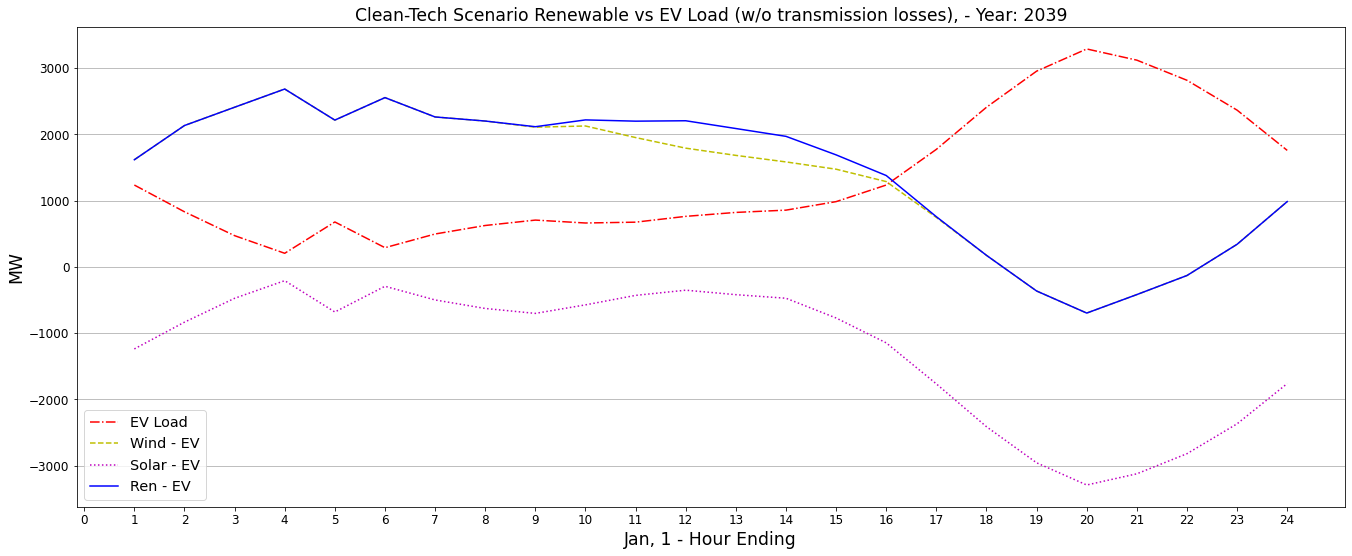

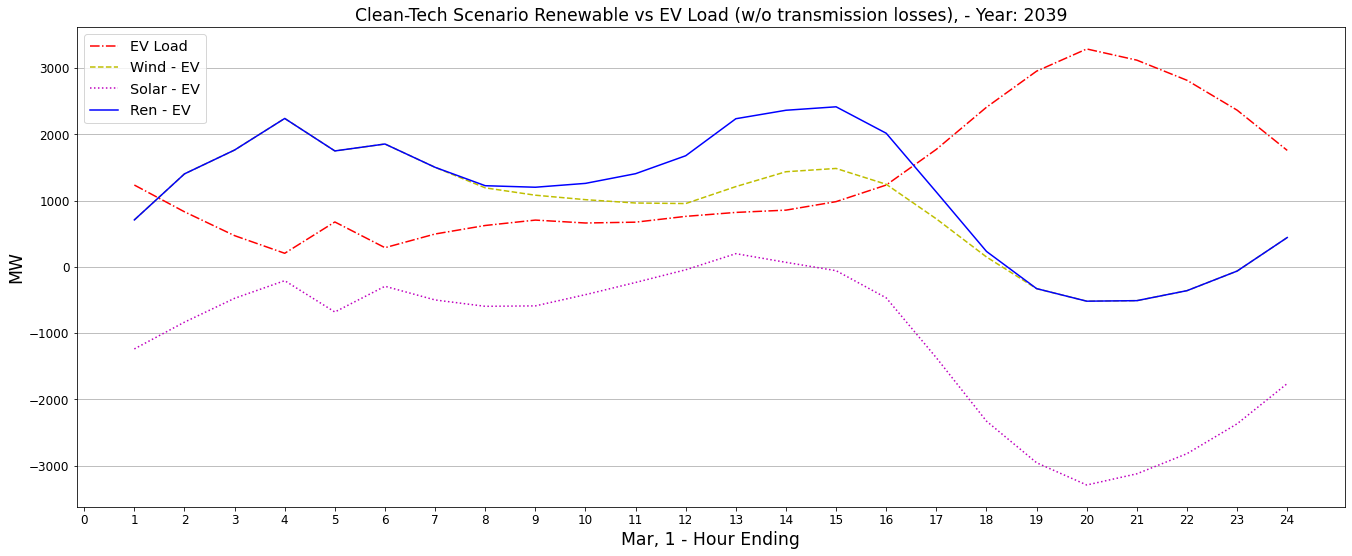

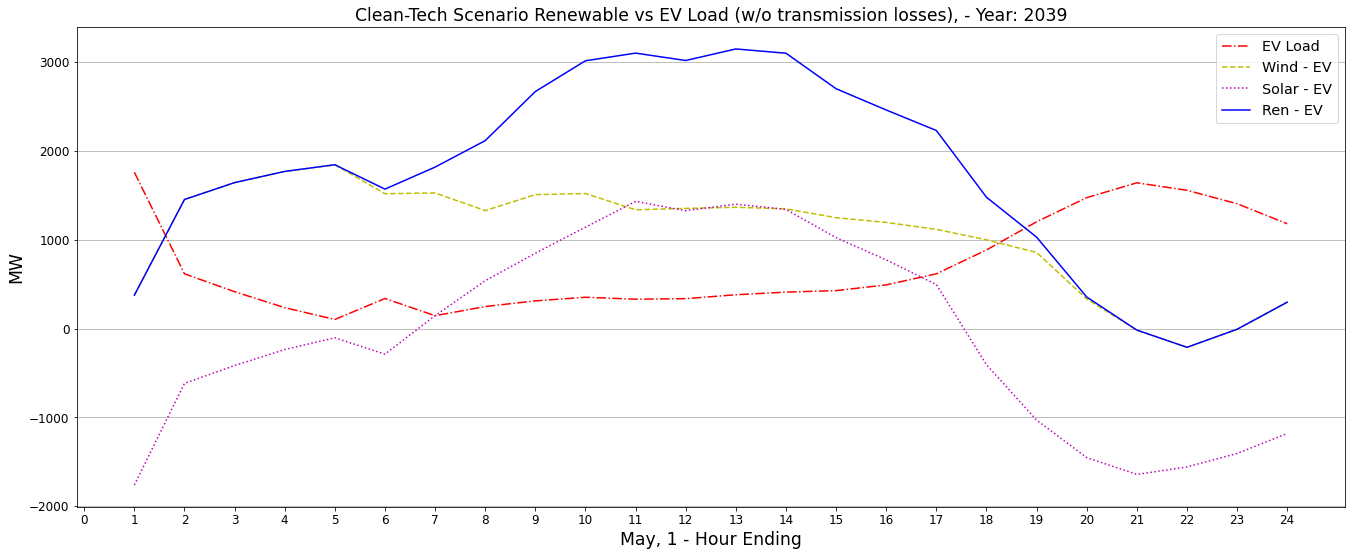

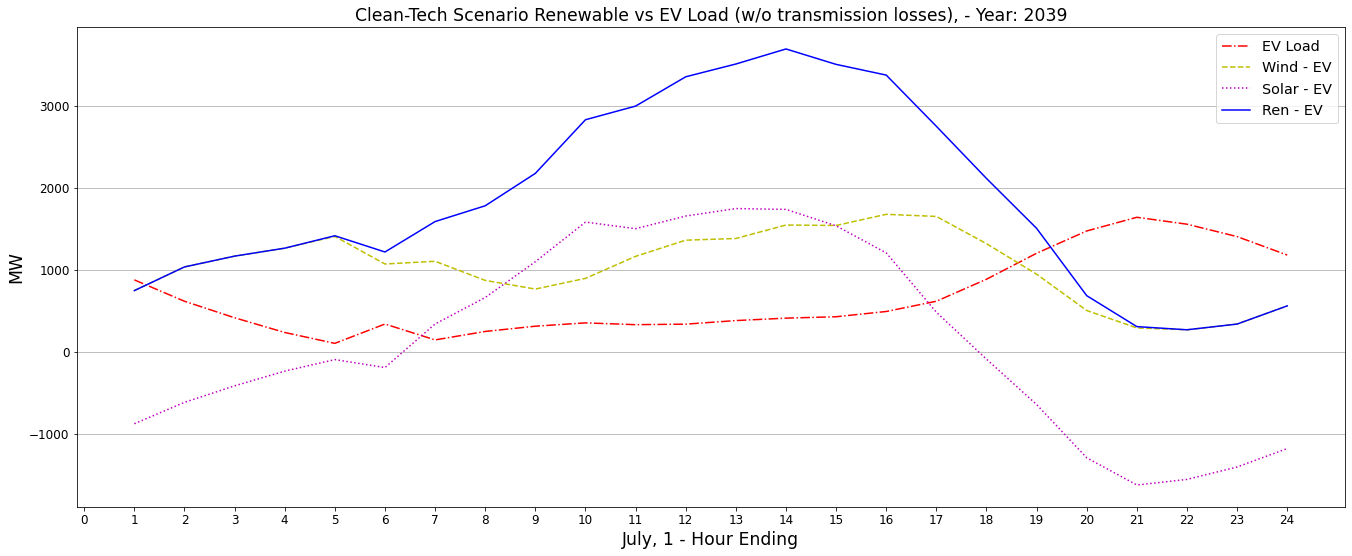

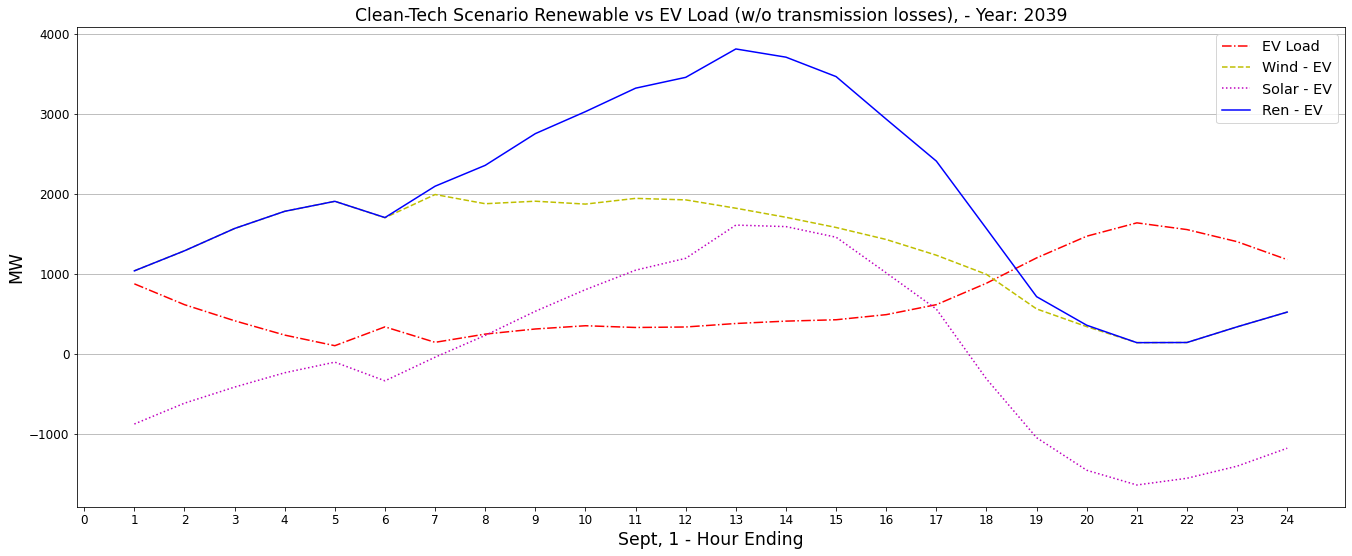

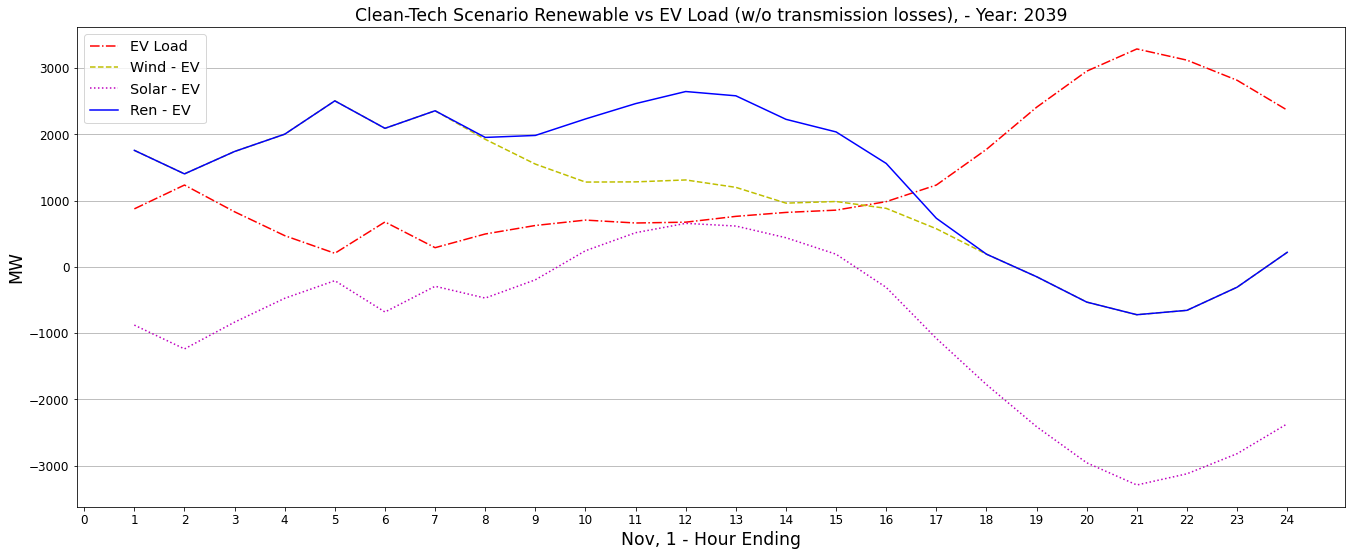

In [227]:
# Clean-Tech Scenario without transmission losses.

# Asks user to input a year, returning subplots showing the first day of every second month's data (starting in Jan)

# year = "2039"
year = int(input("Please enter a year between 2021-2041: "))

# Need to add condition to test if string input.
while True:
    if (year >= 2021 and year <= 2041):
        break

    print("Invalid entry.\n")
    year = int(input("Please enter a year between 2021-2041: "))

m = ["01", "03", "05", "07", "09", "11"]
n = ["Jan, 1", "Mar, 1", "May, 1", "July, 1", "Sept, 1", "Nov, 1"]

# Convert "year" into a string to be used below.
year = str(year)

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ct"] - day_data["EV Load ct (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ct"] - day_data["EV Load ct (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ct"]\
                                    + day_data["Solar Generation Output ct"]\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ct (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Clean-Tech Scenario Renewable vs EV Load (w/o transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

**Reference Scenario without transmission losses**

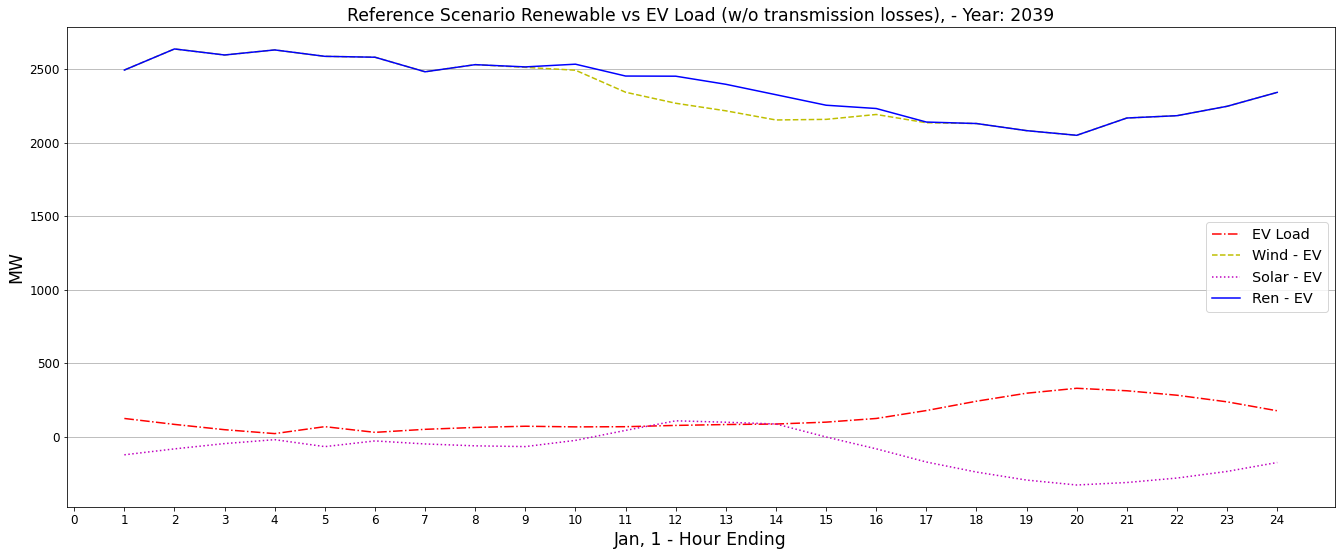

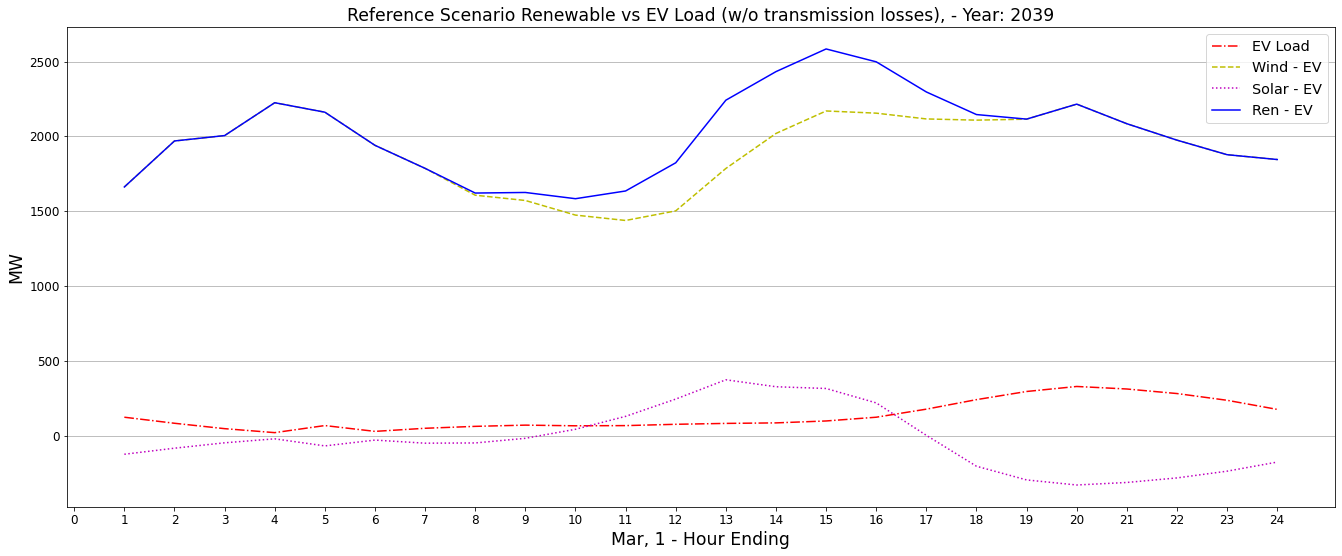

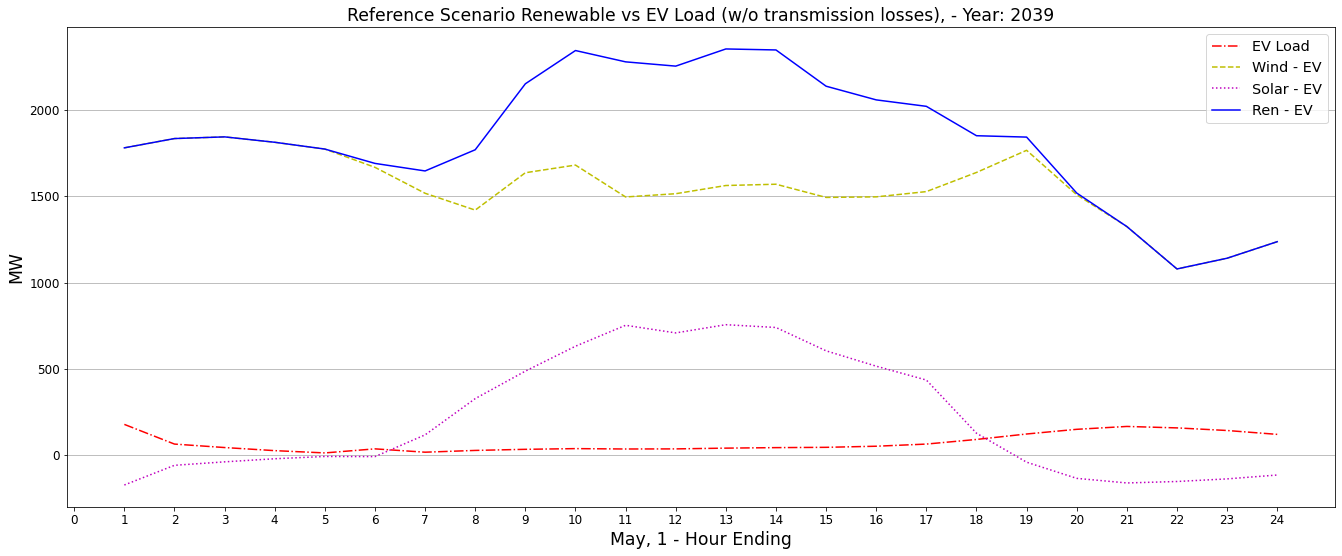

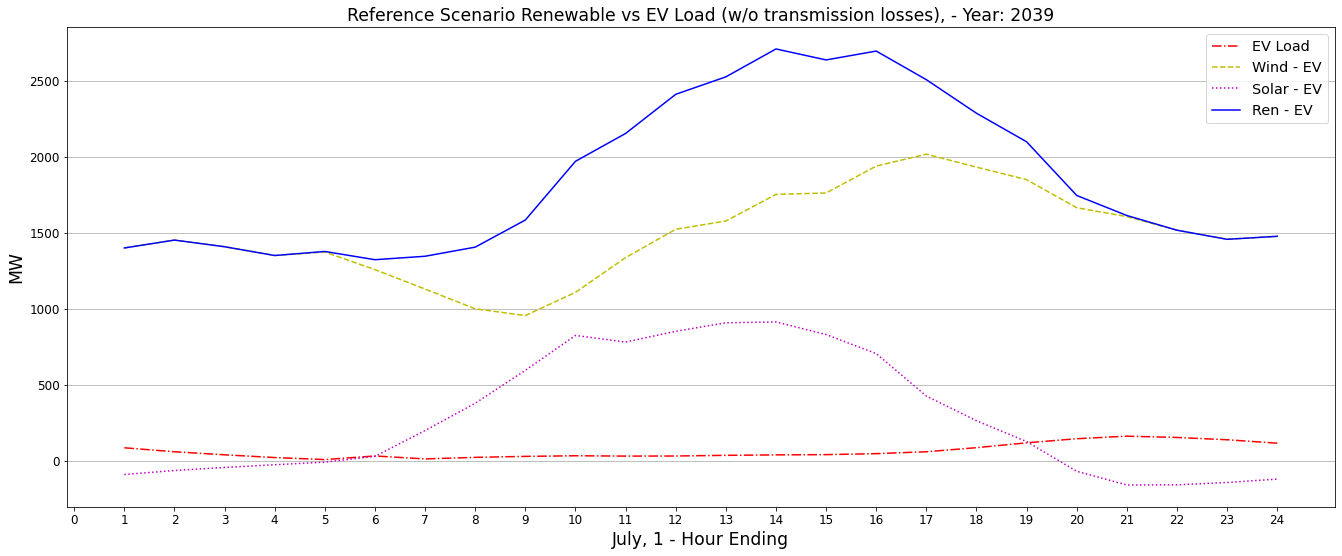

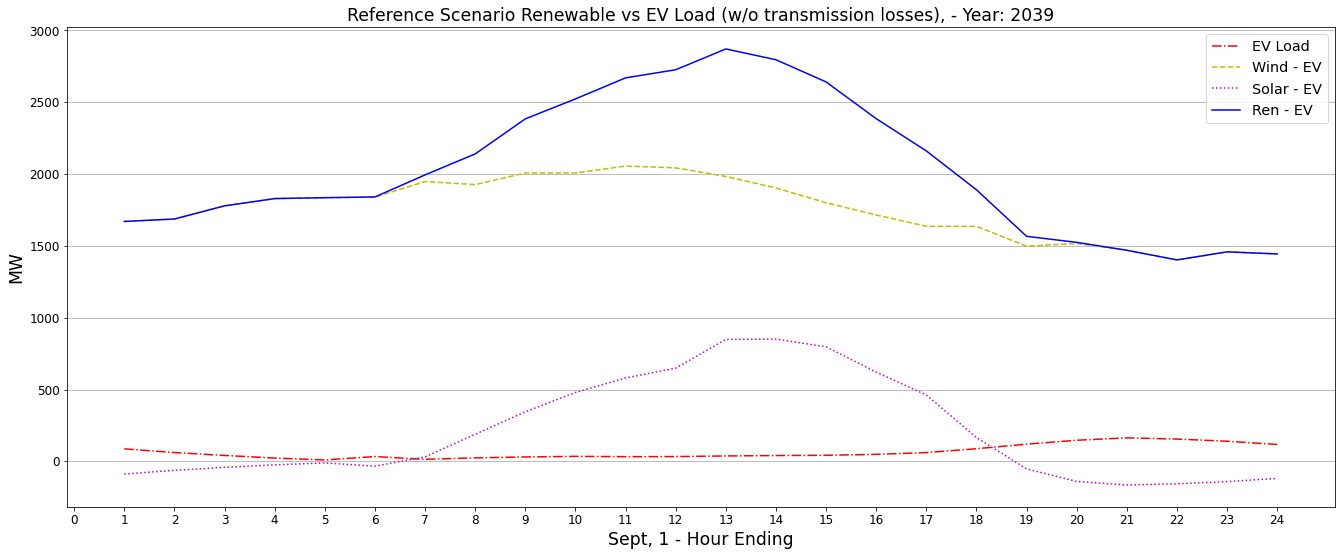

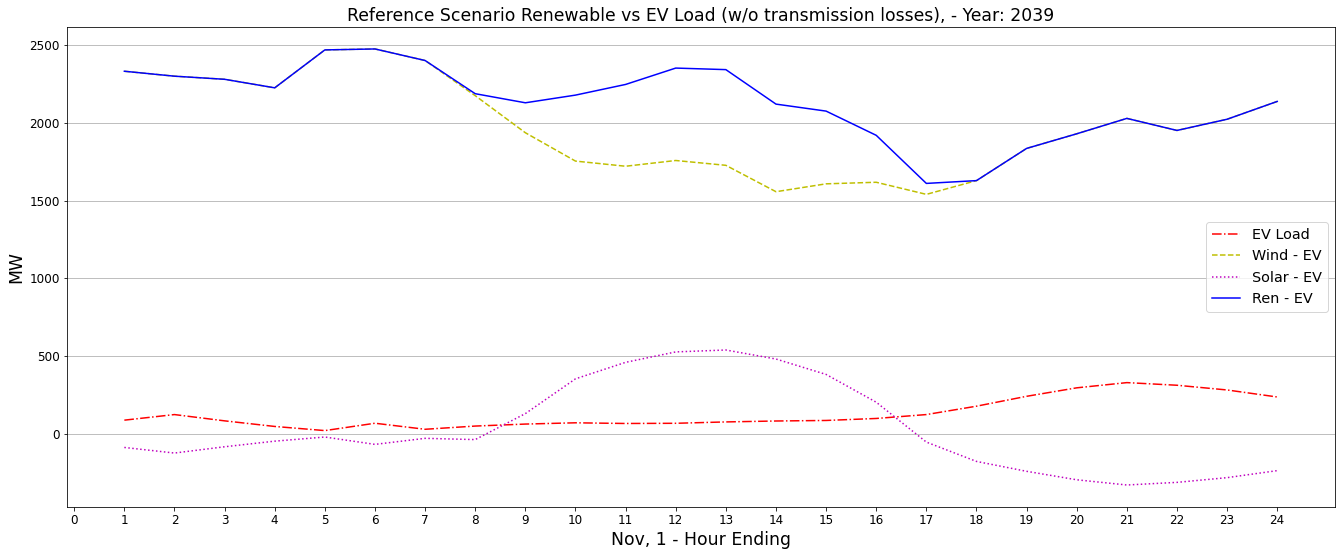

In [229]:
# Reference scenario without transmission losses.

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ref"] - day_data["EV Load ref (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ref"] - day_data["EV Load ref (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ref"]\
                                    + day_data["Solar Generation Output ref"]\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ref (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Reference Scenario Renewable vs EV Load (w/o transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

**Clean-Tech Scenario with transmission losses**

*Transmission losses assumed at 2.8% to follow with AESO 2021 LTO assumptions*

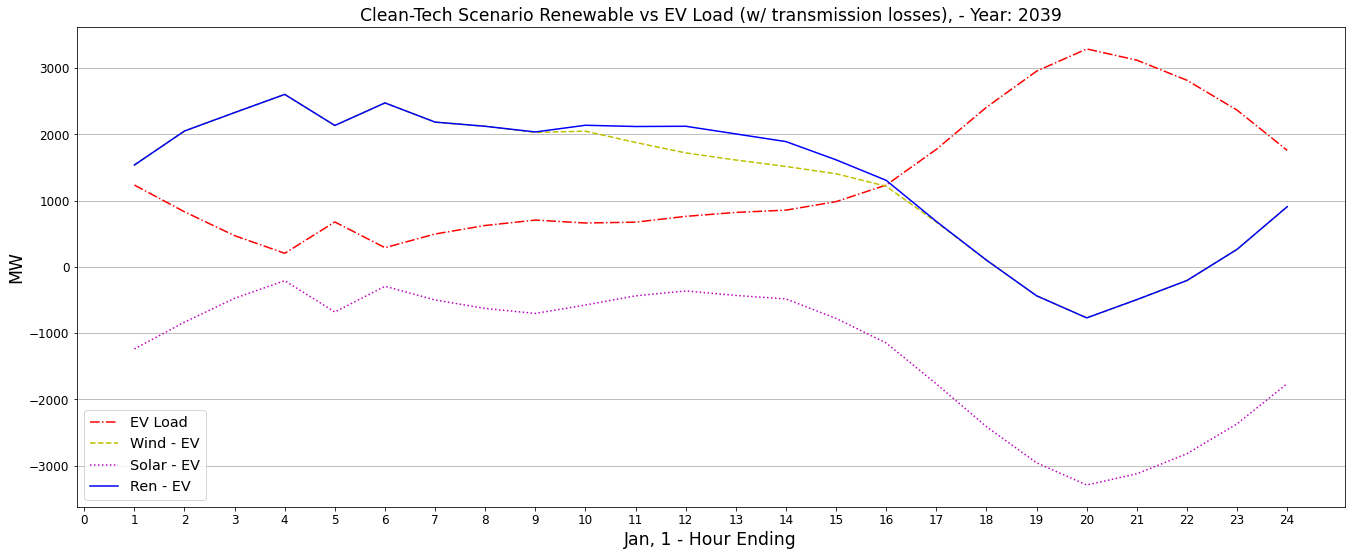

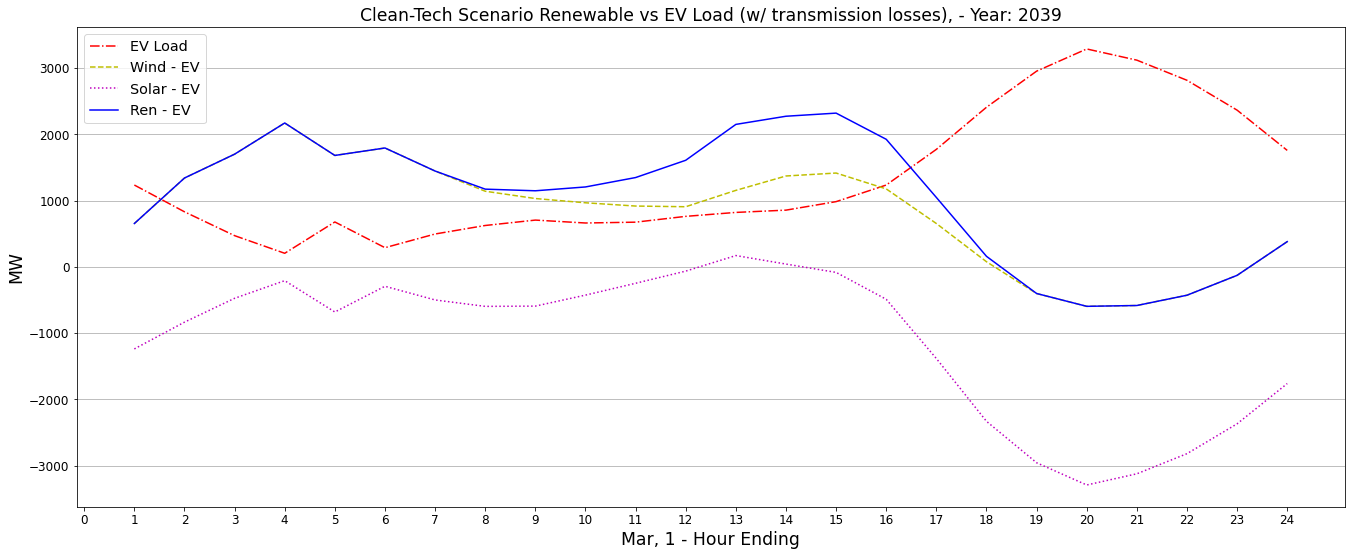

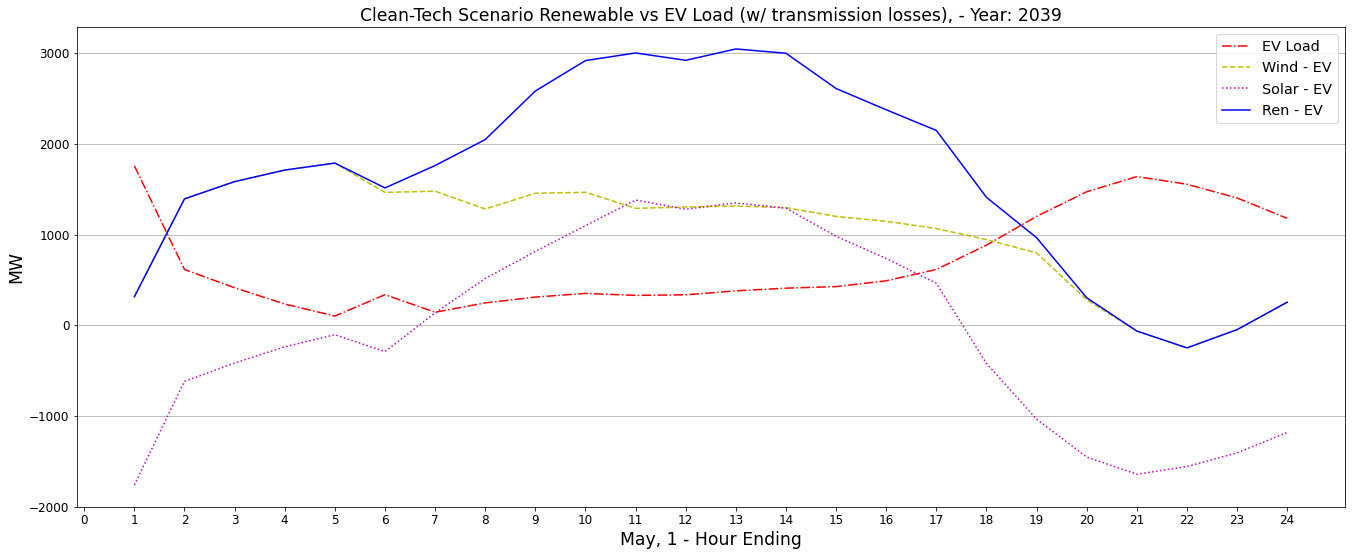

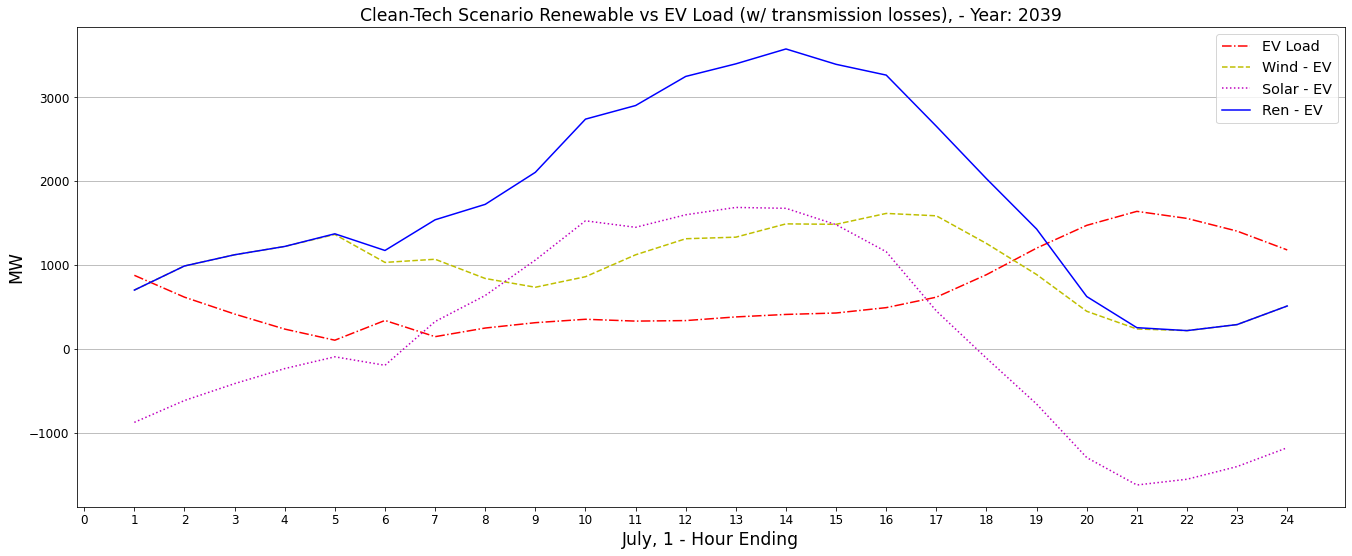

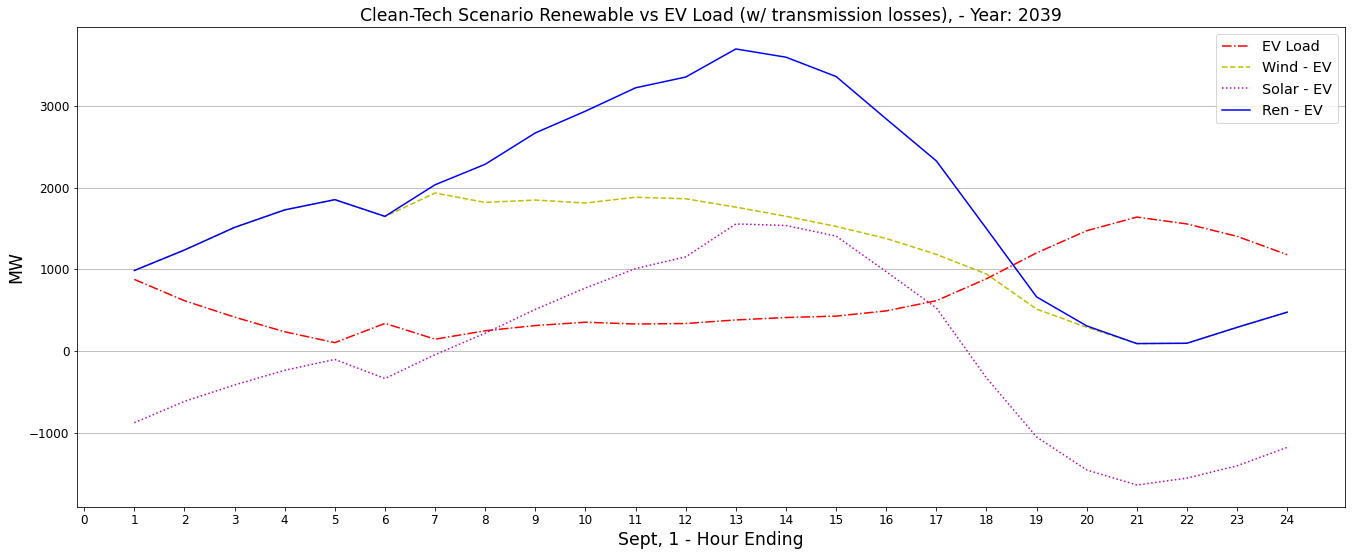

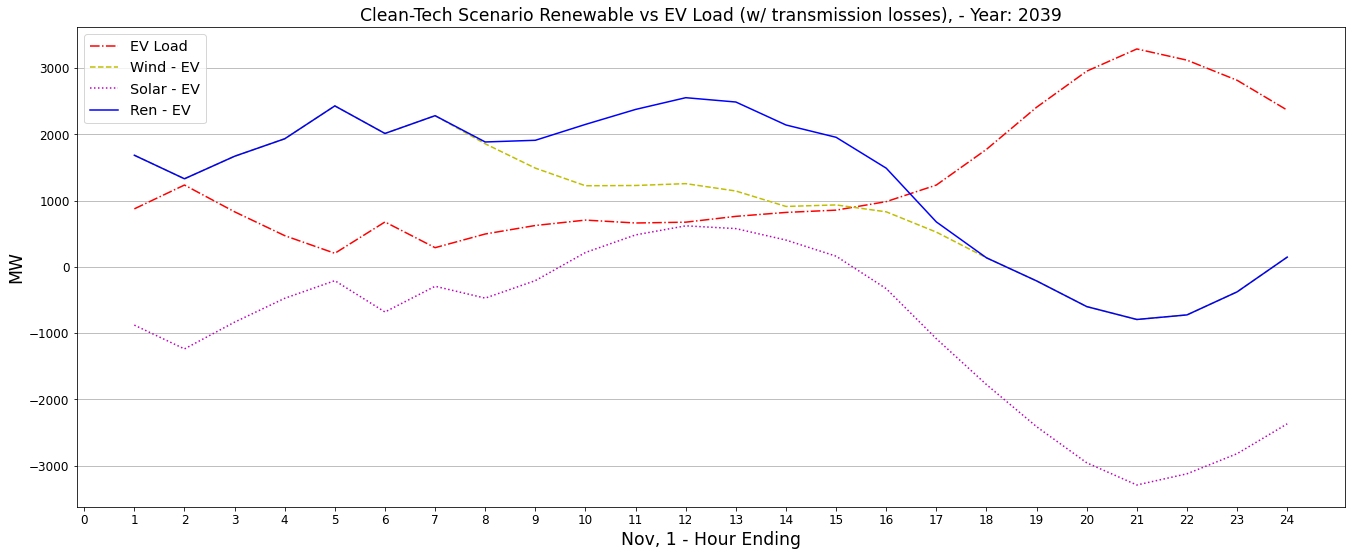

In [230]:
# Clean-Tech scenario with 2.8% transmission losses.

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ct"]\
                                    * 0.972\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ct"]\
                                    * 0.972\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ct"]\
                                    * 0.972\
                                    + day_data["Solar Generation Output ct"]\
                                    * 0.972\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ct (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Clean-Tech Scenario Renewable vs EV Load (w/ transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

**Reference Scenario with transmission losses**

*Transmission losses assumed at 2.8% to follow with AESO 2021 LTO assumptions*

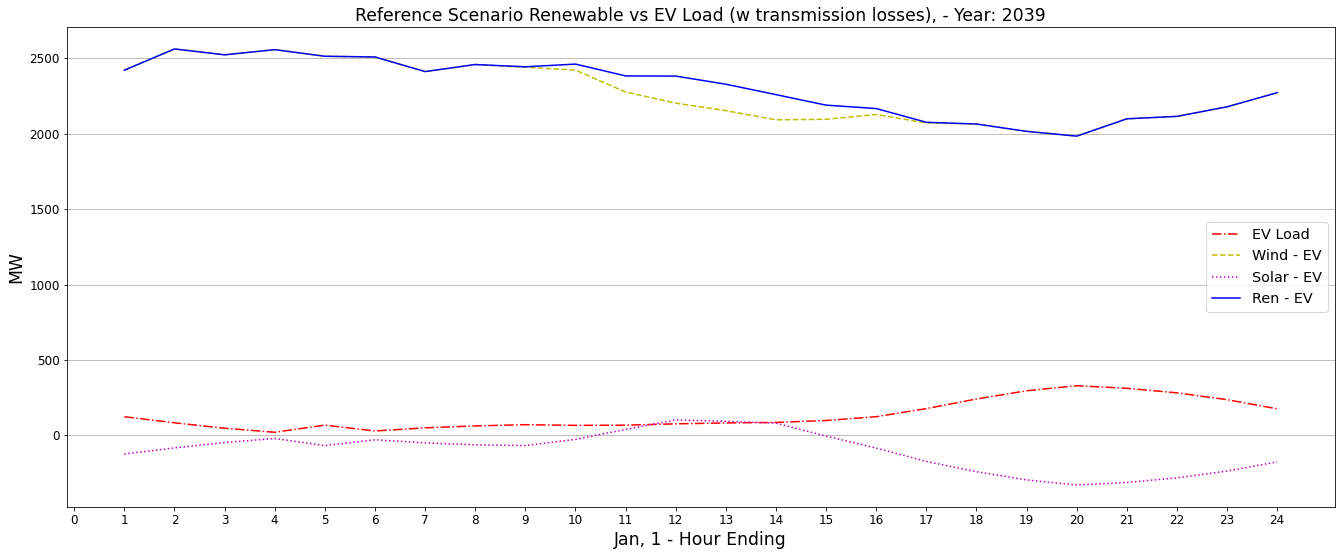

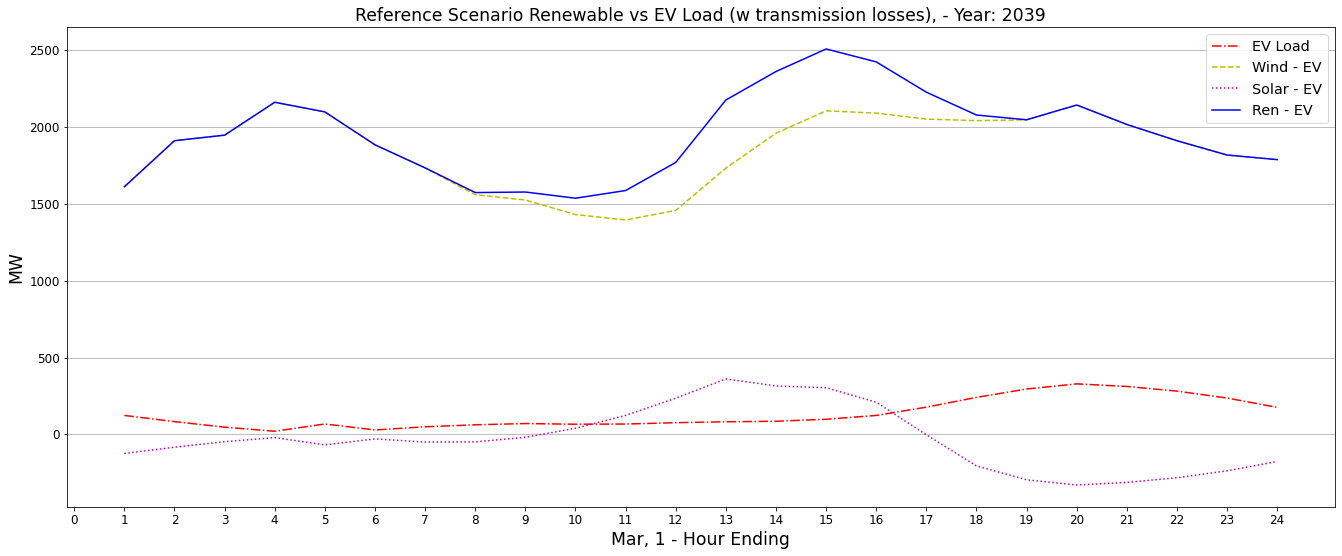

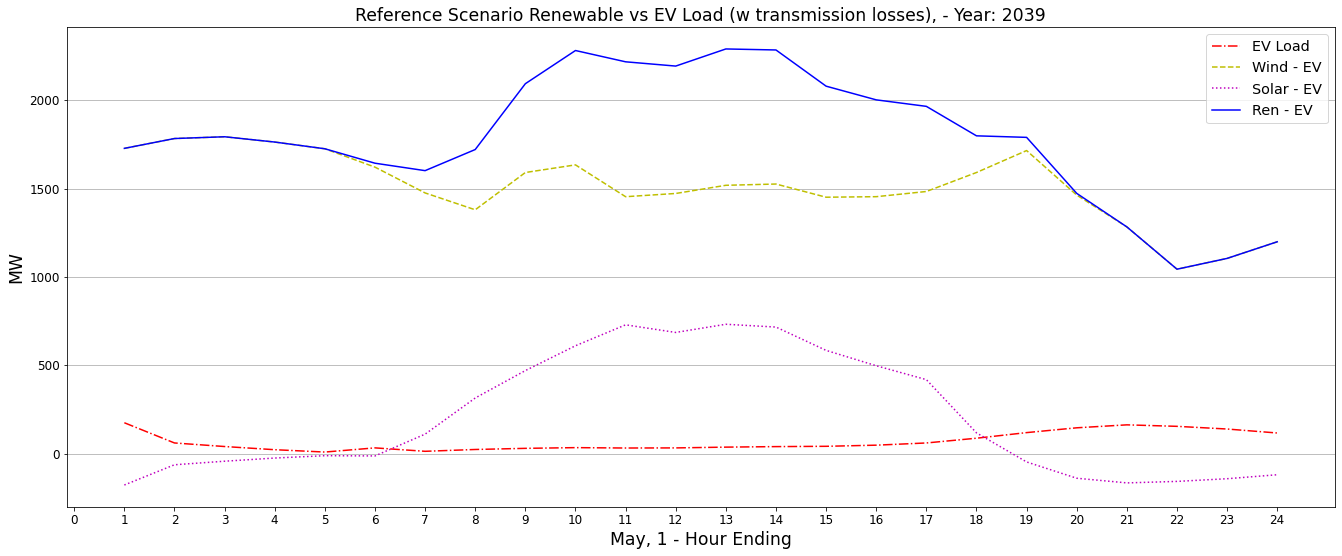

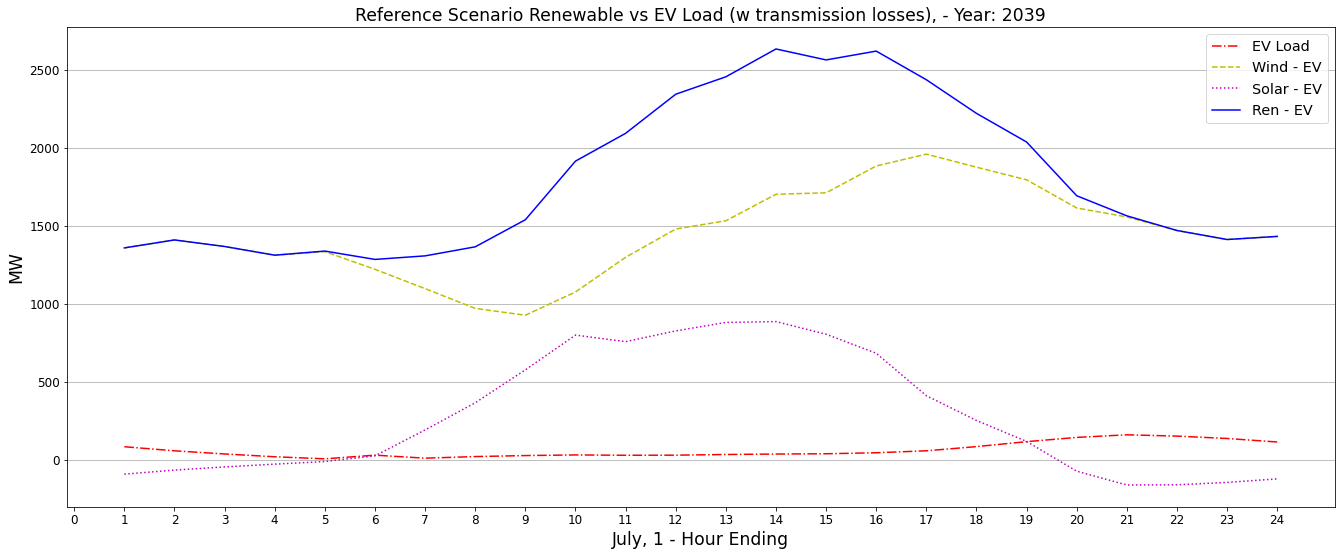

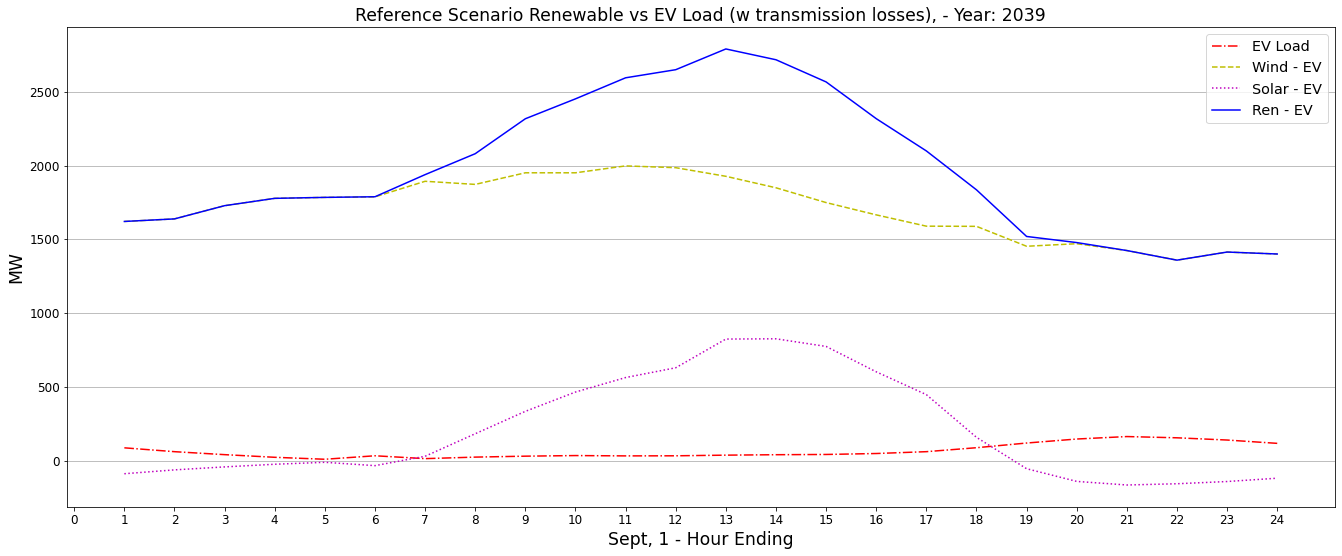

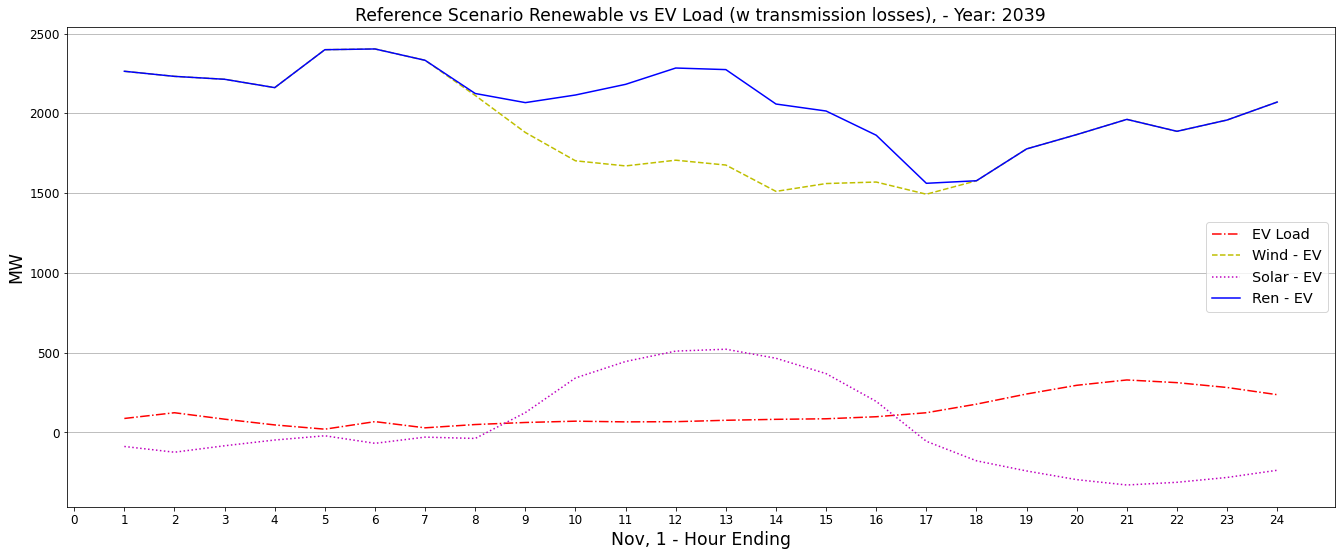

In [231]:
# Reference scenario with 2.8% transmission losses.

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ref"]\
                                    * 0.972\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ref"]\
                                    * 0.972\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ref"]\
                                    * 0.972\
                                    + day_data["Solar Generation Output ref"]\
                                    * 0.972\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ref (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Reference Scenario Renewable vs EV Load (w transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

In [ ]:
# Delete vaiables from cells above
del year
del m
del n

# Analysis of 'Ren - EV Load' where negatives values occur.

**Hours with negative "Ren - EV Load" analysis**

- Analyze frequency of time of day where deficiency occurs.
- Analyze frequency of deficiency magnitudes

The average negative 'Ren - EV Load' value is: -769.39 MW

The most common hour to have a negative 'Ren - EV Load' value is hour: 20

The number of hours where 'Ren - EV Load' is negative is: 7089

The average negative 'Ren - EV Load' value, with transmission losses, is: -775.22 MW

The most common hour to have a negative 'Ren - EV Load' value, with transmission losses, is hour: 20

The number of hours where 'Ren - EV Load' is negative is: 7509


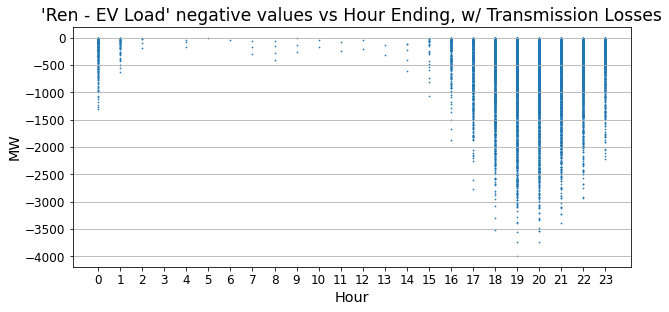

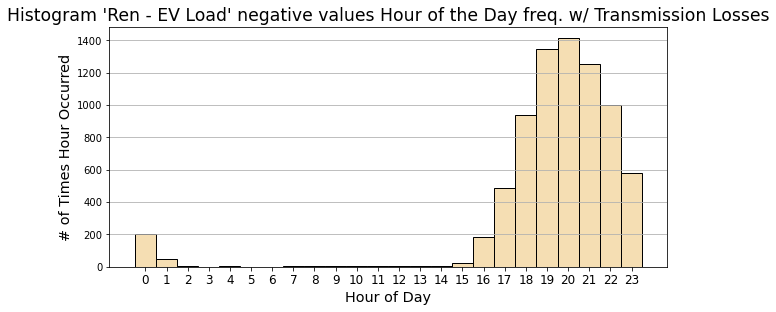

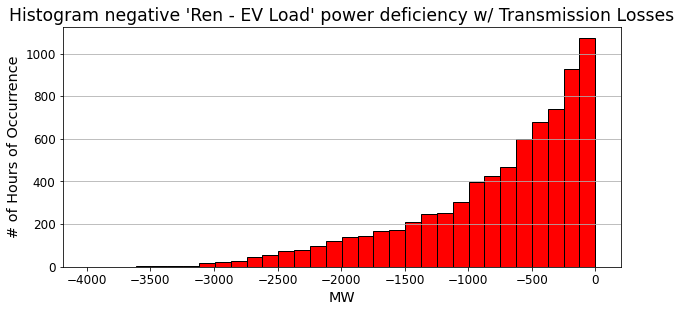

In [397]:
# First analyze without transmission losses.
# Create dataframe to work with for this cell.
neg_ren = evhr[(evhr["Wind Generation Output ct"] + evhr["Solar Generation Output ct"]\
               - evhr["EV Load ct (MWh)"]) <= 0].copy()

neg_ren["Ren - EV Load"] = neg_ren["Wind Generation Output ct"] + neg_ren["Solar Generation Output ct"]\
                            - neg_ren["EV Load ct (MWh)"]

x = neg_ren["Ren - EV Load"].mean()
y = neg_ren["Hour Ending"].mode()

# Outputs.
print("The average negative 'Ren - EV Load' value is: %.2f MW\n" % x)

print("The most common hour to have a negative 'Ren - EV Load' value is hour: %.0f\n" % (y - 1))

print("The number of hours where 'Ren - EV Load' is negative is: %d\n" % neg_ren["Ren - EV Load"].size)

# --------------------
# Next analyze with transmission losses.
# Modify dataframe for transmission losses.
neg_ren = evhr[(evhr["Wind Generation Output ct"]\
                    * 0.972\
                    + evhr["Solar Generation Output ct"]\
                    * 0.972\
                    - evhr["EV Load ct (MWh)"]) <= 0].copy()

neg_ren["Ren - EV Load"] = neg_ren["Wind Generation Output ct"]\
                                * 0.972\
                                + neg_ren["Solar Generation Output ct"]\
                                * 0.972\
                                - neg_ren["EV Load ct (MWh)"].copy()

x = neg_ren["Ren - EV Load"].mean()
y = neg_ren["Hour Ending"].mode()

# Outputs.
print("The average negative 'Ren - EV Load' value, with transmission losses, is: %.2f MW\n" % x)

print("The most common hour to have a negative 'Ren - EV Load' value,\
 with transmission losses,\
 is hour: %.0f\n" % (y - 1))

print("The number of hours where 'Ren - EV Load' is negative is: %d" % neg_ren["Ren - EV Load"].size)

# Create this dataframe column for graphing.
neg_ren["Hour of Day"] = neg_ren["Hour Ending"] - 1

# display(neg_ren)

# --------------------
# Graph the negative 'Ren - EV Load' against time of day.
# Graph will include transmission losses.
# Scatter plot.
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.scatter(neg_ren["Hour of Day"], neg_ren["Ren - EV Load"], s=0.5)

plt.xlabel("Hour", fontsize="x-large")
plt.ylabel("MW", fontsize="x-large")
plt.title("'Ren - EV Load' negative values vs Hour Ending, w/ Transmission Losses",\
          fontsize="xx-large")

plt.xticks(np.arange(0, 24, step=1), fontsize="large")
plt.yticks(fontsize="large")

plt.grid(axis = "y")

# --------------------
# Histogram of negative 'Ren - EV Load' hour frequency.
# Histogram will include transmission losses.
plt.figure(figsize=(10,15))
plt.subplot(3,1,2)

bins = np.arange(0, 25, 1) - 0.5
plt.hist(neg_ren["Hour of Day"], bins, edgecolor="black", color="wheat")

plt.xlabel("Hour of Day", fontsize="x-large")
plt.ylabel("# of Times Hour Occurred", fontsize="x-large")
plt.title("Histogram 'Ren - EV Load' negative values Hour of the Day freq. w/ Transmission Losses",\
          fontsize="xx-large")

plt.xticks(np.arange(0, 24, step=1), fontsize="large")
plt.grid(axis = "y")
# plt.yticks(fontsize="large")

# --------------------
# Histogram of negative 'Ren - EV Load' power deficiency.
# Histogram includes transmission losses.
plt.figure(figsize=(10,15))
plt.subplot(3,1,3)

plt.hist(neg_ren["Ren - EV Load"], bins=32, edgecolor="black", color="red")

plt.xlabel("MW", fontsize="x-large")
plt.ylabel("# of Hours of Occurrence", fontsize="x-large")
plt.title("Histogram negative 'Ren - EV Load' power deficiency w/ Transmission Losses",\
          fontsize="xx-large")

plt.xticks(np.arange(-4000, 500, step=500), fontsize="large")
plt.grid(axis = "y")
plt.yticks(fontsize="large")

# Delete variables used in cell.
del neg_ren
del x
del y

# Analysing Our Capacity Factors Used to Project Data

## Look at how projected data compares to historical

**Looking at the standard deviations associated with the historical capacity factor averages used.**

**Look for potential outliers in projected data by comparing with historical known data.**

# Historical Average CF Standard Deviations

**Discussion Below**

**Note that CF range is [0,1]**

*Ask regarding below cell analysis.*

- The below analysis shows that on average solar has relatively low variance while average wind cf contains roughly 2x the variance in comparison.

- Min solar CF variance = 0 is due to overnight hours without sunlight.

- Both solar and wind contain hours where standard deviation is roughly 50% of the respective CF.

- The average standard deviations suggest that solar is generally more consistent than wind.

Conclusion:

    Forecasting hourly wind and solar generation using historical hourly average capacity factors will provide a "big picture" overview of available renewable power in the province.  However, projecting renewable generation in this manner will overlook outlier events (ie. wind does not blow, or wind cf > 0.9).
    
    Outlier events will occur more frequently for wind generation than for solar generation according to the average standard deviations.  However, both sources of renewable energy will contain hours where actual generation is off by roughly a 50% cf for the specific hour.

In [243]:
# isinstance(cf, pd.DataFrame)
# display(cf)
# cf.head()

# Print out various data regarding the standard deviations from the historical Capacity Factors.

print("Wind CF max standard deviation is: %.3f\n" % max(cf["Wind Avg. Capacity Factor std"]))
print("Wind CF min standard deviation is: %.3f\n" % min(cf["Wind Avg. Capacity Factor std"]))

print("Solar CF max standard deviation is: %.3f\n" % max(cf["Solar Avg. Capacity Factor std"]))
print("Solar CF min standard deviation is: %.3f\n" % min(cf["Solar Avg. Capacity Factor std"]))

print("Wind CF average standard deviation is: %.3f\n" % cf["Wind Avg. Capacity Factor std"].mean())
print("Solar CF average standard deviation is: %.3f\n" % cf["Solar Avg. Capacity Factor std"].mean())

print("When 'Solar std = 0' is removed from the analysis:\n")

cf1 = cf[cf["Solar Avg. Capacity Factor std"] != 0].copy()

print("New Solar CF min standard deviation is: %.5f\n" % min(cf1["Solar Avg. Capacity Factor std"]))

print("New Solar CF average standard deviation is: %.3f\n" % cf1["Solar Avg. Capacity Factor std"].mean())

del cf1

Wind CF max standard deviation is: 0.530

Wind CF min standard deviation is: 0.017

Solar CF max standard deviation is: 0.488

Solar CF min standard deviation is: 0.000

Wind CF average standard deviation is: 0.234

Solar CF average standard deviation is: 0.077

When 'Solar std = 0' is removed from the analysis:

New Solar CF min standard deviation is: 0.00045

New Solar CF average standard deviation is: 0.142



### Back Compare Projected Data to Actual

**Use the following formula:**

$\large\frac{Generation_{year ahead}}{EVs_{year ahead}}=\frac{Generation_{year historical}}{EVs_{year historical}}$

$\Rightarrow Generation_{year historical}=\large\frac{Generation_{year ahead}}{EVs_{year ahead}}\cdot EVs_{year historical}$

Then compare the actual historical data with the formula.

In [222]:
# Find the number of EVs for the first year given.
print("\nOn %s\n" % evhr["Date Time"].iloc[0])
print("The number of EVs for this year was: %.2f\n" % evhr["Number of Electric Vehicles ct"].iloc[0])



On 2021-01-01 00:00:00

The number of EVs for this year was: 15130.70



# Discuss the below cell with Dr. Rosehart

**This is the reverse data analysis suggested**

**Likely I misunderstand something, due to not understanded the dependence relationship**

**Suspect the ratios to be independent**

In [223]:
# Get one year (2021) from the historical data.
test1 = gen_hist.set_index("Date")
test1 = test1["2021-01-01 00:00:00":"2021-12-31 23:00:00"].copy()
# display(test1)
# display(gen_hist)

# Get one year (2030) from the projected data.
test2 = evhr["2030-01-01 00:00:00":"2030-12-31 23:00:00"].copy()
# display(test2)
# list(test2)

# Wind formula as indicated above, result in test3 dataframe.
# Result is back generated Wind data.
test3 =  test2["Wind Generation Output ct"] / test2["Number of Electric Vehicles ct"]
test3 = test3 * evhr["Number of Electric Vehicles ct"].iloc[0]
test3 = test3.to_frame()
test3.columns = ["reverse Wind Generation data"]

# Solar formula as indicated above, result in test4 dataframe.
# Result is back generated Solar data.
test4 =  test2["Solar Generation Output ct"] / test2["Number of Electric Vehicles ct"]
test4 = test4 * evhr["Number of Electric Vehicles ct"].iloc[0]
test4 = test4.to_frame()
test4.columns = ["reverse Solar Generation data"]

# Convert the string columns we want to perform math operations on into floats.
test1["Wind Utilized"] = test1["Wind Utilized"].str.replace(",", "").astype(float)
test1["Solar Utilized"] = test1["Solar Utilized"].astype(float)

test3["reverse Solar Generation data"] = test4["reverse Solar Generation data"]

# Find difference between the actual values and the reverse generated values base on the above ratio.
test3["actual - reverse for Wind"] = test1["Wind Utilized"].to_numpy()\
                                            - test3["reverse Wind Generation data"].to_numpy()
test3["actual - reverse for Solar"] = test1["Solar Utilized"].to_numpy()\
                                            - test3["reverse Solar Generation data"].to_numpy()

test = test3.copy()

del test1
del test2
del test3
del test4

# display(test)

test1 = test[test["actual - reverse for Wind"] < 0]
test2 = test[test["actual - reverse for Solar"] < 0]
test3 = test[abs(test["actual - reverse for Wind"]) > 100]
test4 = test[abs(test["actual - reverse for Solar"]) > 100]

display(test1)
display(test2)
display(test3)
display(test4)
# print(test1.shape)
# print(test2.shape)
# shape(test1)

del test
del test1
del test2
del test3
del test4

,reverse Wind Generation data,reverse Solar Generation data,actual - reverse for Wind,actual - reverse for Solar
Date,,,,
2030-01-07 11:00:00,80.633170,22.624797,-8.633170,17.375203
2030-01-07 12:00:00,78.721319,26.893627,-47.721319,13.106373
2030-01-07 13:00:00,76.507596,23.051680,-63.507596,19.948320
2030-01-07 14:00:00,80.633170,20.835954,-68.633170,23.164046
2030-01-07 15:00:00,80.566088,9.167820,-63.566088,13.832180
...,...,...,...,...
2030-12-31 14:00:00,99.435438,12.115345,-80.435438,45.884655
2030-12-31 15:00:00,105.377031,5.122596,-81.377031,22.877404
2030-12-31 16:00:00,114.346920,0.284589,-81.346920,1.715411


,reverse Wind Generation data,reverse Solar Generation data,actual - reverse for Wind,actual - reverse for Solar
Date,,,,
2030-01-01 15:00:00,127.959877,3.435392,1310.040123,-0.435392
2030-01-02 08:00:00,145.334246,0.203278,1434.665754,-0.203278
2030-01-03 08:00:00,90.091803,0.121967,1011.908197,-0.121967
2030-01-05 08:00:00,103.172892,0.142294,1119.827108,-0.142294
2030-01-06 10:00:00,122.425570,12.887800,1426.574430,-0.887800
...,...,...,...,...
2030-12-18 16:00:00,176.906147,0.386227,1010.093853,-0.386227
2030-12-23 16:00:00,115.228576,0.142294,1327.771424,-0.142294
2030-12-25 16:00:00,31.662942,0.081311,86.337058,-0.081311


,reverse Wind Generation data,reverse Solar Generation data,actual - reverse for Wind,actual - reverse for Solar
Date,,,,
2030-01-01 00:00:00,144.663421,0.0,1325.336579,0.0
2030-01-01 01:00:00,150.365434,0.0,1373.634566,0.0
2030-01-01 02:00:00,146.105695,0.0,1387.894305,0.0
2030-01-01 03:00:00,146.541731,0.0,1336.458269,0.0
2030-01-01 04:00:00,146.742978,0.0,1299.257022,0.0
...,...,...,...,...
2030-12-30 21:00:00,110.705299,0.0,105.294701,0.0
2030-12-31 20:00:00,120.863506,0.0,191.136494,0.0
2030-12-31 21:00:00,129.603398,0.0,329.396602,0.0


,reverse Wind Generation data,reverse Solar Generation data,actual - reverse for Wind,actual - reverse for Solar
Date,,,,
2030-02-24 12:00:00,65.338359,31.020162,556.661641,104.979838
2030-02-24 14:00:00,63.728379,34.516537,951.271621,101.483463
2030-03-03 11:00:00,123.623472,30.644099,887.376528,105.355901
2030-03-11 15:00:00,93.762175,43.628456,630.237825,103.371544
2030-03-11 16:00:00,95.448820,27.290018,607.551180,104.709982
...,...,...,...,...
2030-12-17 10:00:00,152.219786,18.620229,-75.219786,132.379771
2030-12-17 11:00:00,149.996480,21.974309,5.003520,159.025691
2030-12-17 12:00:00,147.313180,22.645125,89.686820,169.354875


# Analyzing AESO's EV Daily Loading Profile

**Objectives of this section:**

- Determine how the AESO EV daily loading profile is created.
- Determine scenarios where EV loading profile can be changed.
- Quantify the loading profile changes.
- Graph (Ren - EV Load) with changes and look for patterns.

**Below cell is to see how AESO's daily EV Load is spread across each hour of the day.**

*Idea is to investigate if each hour of the day is generally attributed to the same daily EV Load percentage.*

,EV Load percent of day std
Hour,
0000,0.008873
0100,0.006643
0150,0.001074
0200,0.005621
0300,0.003905
0400,0.006454
0500,0.005896
0600,0.003428
0700,0.003907


EV Load percent of day std max: 0.0109

EV Load percent of day std min: 0.0011

EV Load percent of day std average: 0.0067



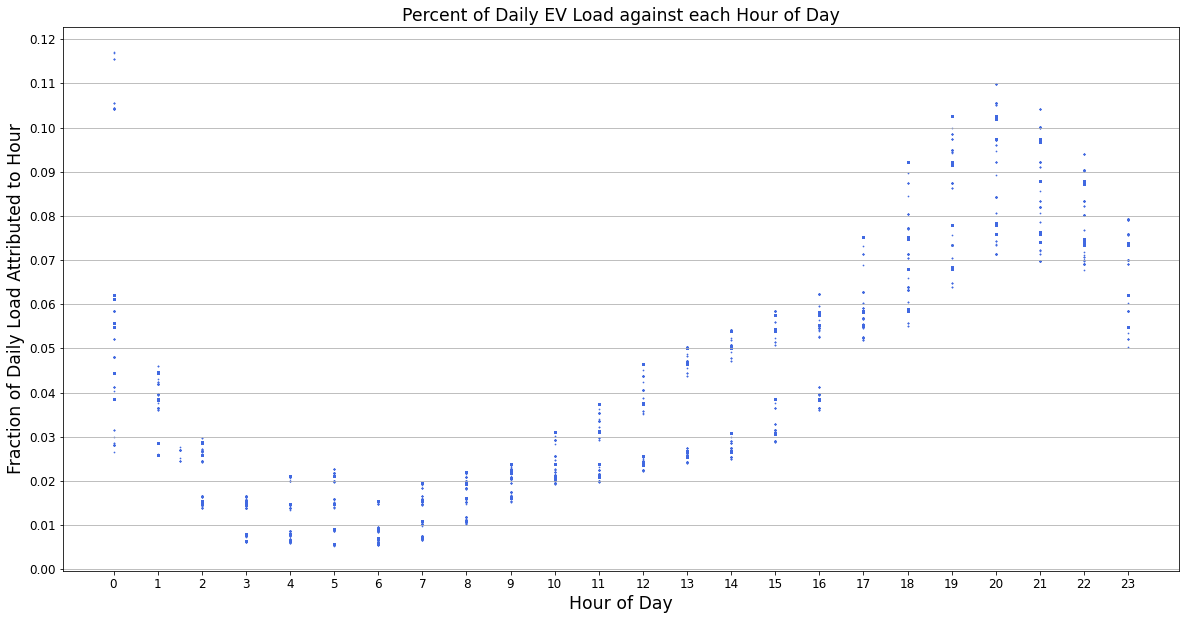

In [418]:
# Sum the daily EV loads.
temp1 = evhr.groupby(["Calendar Date"]).sum()["EV Load ct (MWh)"]
temp1 = temp1.to_frame()
temp1.rename(columns = {"EV Load ct (MWh)":"EV Load ct daily sum (MWh)"}, inplace=True)

# Join summed EV loads, from above snippet, to new DataFrame column in main DataFrame.
temp2 = evhr.copy()
temp2 = temp2.join(temp1, on="Calendar Date")

# Create a column that gives percentage (as decimal) of Hourly EV load across the day.
# i.e 'EV Load ct (MWh)' / 'EV Load ct daily sum (MWh)' = 'EV Load percent of day'
temp2["EV Load percent of day"] = temp2["EV Load ct (MWh)"] / temp2["EV Load ct daily sum (MWh)"]

# Create a dataframe containing "EV load percent of day" standard deviations for each hour in the day.
# Low variance for this dataframe column would suggest consistency with how AESO spreads
# EV Load across the 24 hour period.
temp3 = temp2.groupby("Hour").std()["EV Load percent of day"]
temp3 = temp3.to_frame()
temp3.rename(columns = {"EV Load percent of day":"EV Load percent of day std"}, inplace=True)

# All 24 hours will be displayed as output.
# REMINDER: Hour = 0150 is used to represent November dailight savings time double hour. 
display(temp3)

# Outputs of note.
print("EV Load percent of day std max: %.4f\n" % temp3["EV Load percent of day std"].max())
print("EV Load percent of day std min: %.4f\n" % temp3["EV Load percent of day std"].min())
print("EV Load percent of day std average: %.4f\n" % temp3["EV Load percent of day std"].mean())

# Create dataframe column for plotting.
temp2["Hour of Day"] = temp2["Hour Ending"] - 1

# --------------
plt.figure(figsize=(20,10))
plt.scatter(temp2["Hour of Day"], temp2["EV Load percent of day"], s=0.5, color="royalblue")

plt.xlabel("Hour of Day", fontsize="xx-large")
plt.ylabel("Fraction of Daily Load Attributed to Hour", fontsize="xx-large")
plt.title("Percent of Daily EV Load against each Hour of Day", fontsize="xx-large")

plt.xticks(np.arange(0, 24, step=1), fontsize="large")
plt.yticks(np.arange(0, 0.13, step=0.01), fontsize="large")

plt.grid(axis = "y")

# plt.figure(figsize=(10,15))
# plt.subplot(3,1,1)
# plt.scatter(neg_ren["Hour of Day"], neg_ren["Ren - EV Load"], s=0.5)

# plt.xlabel("Hour", fontsize="x-large")
# plt.ylabel("MW", fontsize="x-large")
# plt.title("'Ren - EV Load' negative values vs Hour Ending, w/ Transmission Losses",\
#           fontsize="xx-large")

# plt.xticks(np.arange(0, 24, step=1), fontsize="large")
# plt.yticks(fontsize="large")

# plt.grid(axis = "y")

# Delete dataframe objects after use
del temp1
del temp2
del temp3